## Preamble

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from subprocess import Popen, PIPE, STDOUT
import matplotlib.pyplot as plt
import os
from copy import deepcopy
import galsim 
import corner 

from matplotlib.patches import Ellipse

In [3]:
#directories that would be using 
repo = '/Users/Ismael/code/lensing/SMFF/'
os.chdir(repo)

In [4]:
#colormap default to use for galaxy 
cmap = 'bwr'

In [5]:
def showImage(image,ax=None,extent=None,vmin=None,vmax=None,origin=None):
    
    if vmin == None: 
        vmin = -abs(image).max()
    if vmax == None: 
        vmax = abs(image).max()
    
    
    if ax is None: 
        return plt.imshow(image, cmap=cmap,vmax=vmax,vmin=vmin,interpolation='None',origin=origin, extent=extent)
    else: 
        return ax.imshow(image, cmap=cmap,vmax=vmax,vmin=vmin,interpolation='None',origin=origin,extent=extent)

In [6]:
def plot_matrix(matrix, param_names): 

    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    n,_ = matrix.shape #assume square matrix
    plt.xticks(list(plt.xticks()[0]), [None] + param_names)
    plt.yticks(list(plt.yticks()[0]), [None] + param_names)
    
    plt.tick_params(labelsize=20)


    ax.matshow(matrix, cmap=plt.cm.Blues)


    for i in xrange(n):
        for j in xrange(n):
            c = matrix[j,i]
            ax.text(i, j, '{:.2g}'.format(c), va='center', ha='center',size=20)

In [7]:
latex_names =[r'$\rm{flux}$','$x_{0}$','$y_{0}$',r'$\rm{HLR}$','$e_{1}$','$e_{2}$']

In [8]:
#plotting constants
LINEWIDTH = 2
AXIS_NUMBER_SIZE = 45 
AXIS_LABEL_SIZE = 55 
AXIS_WIDTH = 3
AXIS_LENGTH = 12

FIG_SIZE = 40 

MARKER_SIZE = 14
LINE_WIDTH = 5

## Plots for a single galaxy 

### Generating a galaxy file 

In [78]:
#parameters of galaxy to draw. 
model = 'gaussian' #possible options of model and psf_model are in documentation. 
psf_model = 'psf_gaussian'
e1 = 0.2
e2 = 0.2
hlr = 1.0 
psf_fwhm = .7
snr = 20. 

#project folder name where you want to write galaxy information 
project1 = 'project-tutoria145'

#image parameters 
pixel_scale=.2 
nx = 40
ny = 40 



In [72]:
cmd = 'python generate.py -p {0} -gal 1 --galaxy-model {1} --psf_model {2}  --e1 {3} --e2 {4} --y0 0 --x0 0 \
--flux 1. --psf_flux 1. --hlr {5} --psf_fwhm {6} --snr {7}'.format(project1,model,psf_model,e1,e2,hlr,psf_fwhm,snr)
p = Popen(cmd, shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True)
output = p.stdout.read()
print output

### Get fisher formalism analysis from the file

In [79]:
import analysis.fisher as fisher
import analysis.galfun as galfun

In [80]:
g_parameters = galfun.GParameters(project1) #extract parameters from file created by generate.py 
image_renderer = galfun.ImageRenderer(pixel_scale=pixel_scale,
                                      nx=nx,ny=ny)
fish = fisher.Fisher(g_parameters=g_parameters,image_renderer=image_renderer, 
                     snr=snr)

In [81]:
g_parameters.id_params['1']

{'e1': 0.2,
 'e2': 0.2,
 'flux': 1.0,
 'galaxy_model': 'gaussian',
 'hlr': 1.0,
 'psf_flux': 1.0,
 'psf_fwhm': 0.7,
 'psf_model': 'psf_gaussian',
 'x0': 0.0,
 'y0': 0.0}

### Draw galaxy generated 

In [13]:
print fish.biases['e1_1']
print fish.biases['e2_1']
print 'varnoise',fish.var_noise
print 'invariant?', fish.biases['e1_1'] / fish.var_noise

-0.00206095
-0.00206128
varnoise 9.74612543359e-06
invariant? -211.463142351


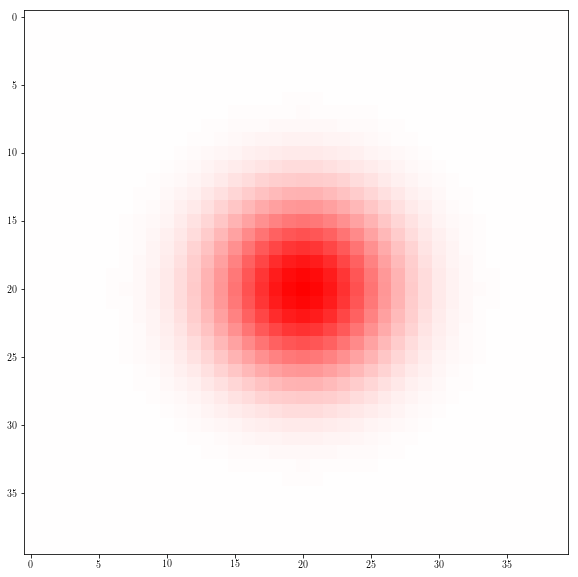

In [104]:
#get galaxy image and display it from fisher object. green is positive and red is negative 
fig = plt.figure(figsize=(10,10))
showImage(fish.image.array)


In [87]:
fish.image.array[10,20]

0.00039505173

### Display derivatives 

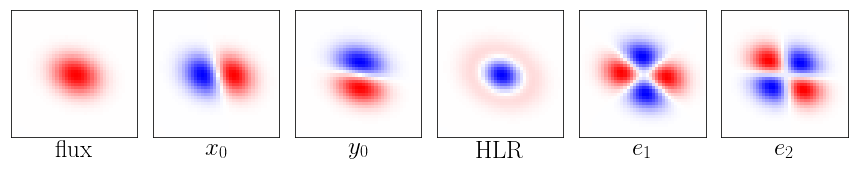

In [15]:
#draw partials.
nrow,ncol = 1,6
fig = plt.figure(figsize=(15,15))
plt.rc('text', usetex=True)
for i,name in enumerate(fish.param_names):
    image = fish.derivatives_images[name]
    plt.subplot(nrow,ncol,i+1)
    showImage(image)
    #plt.title('Partial derivative with respect to {0}'.format(name[:-2]),fontsize=14)
    #plt.colorbar()
    plt.tick_params(
    axis='both',     
    which='both',      
    bottom='off',   
    top='off',        
    left='off',
    labelleft='off',
    right='off',
    labelbottom='off')
    plt.xlabel(latex_names[i],size=25)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.125, hspace=.1)


### Display fisher matrix 


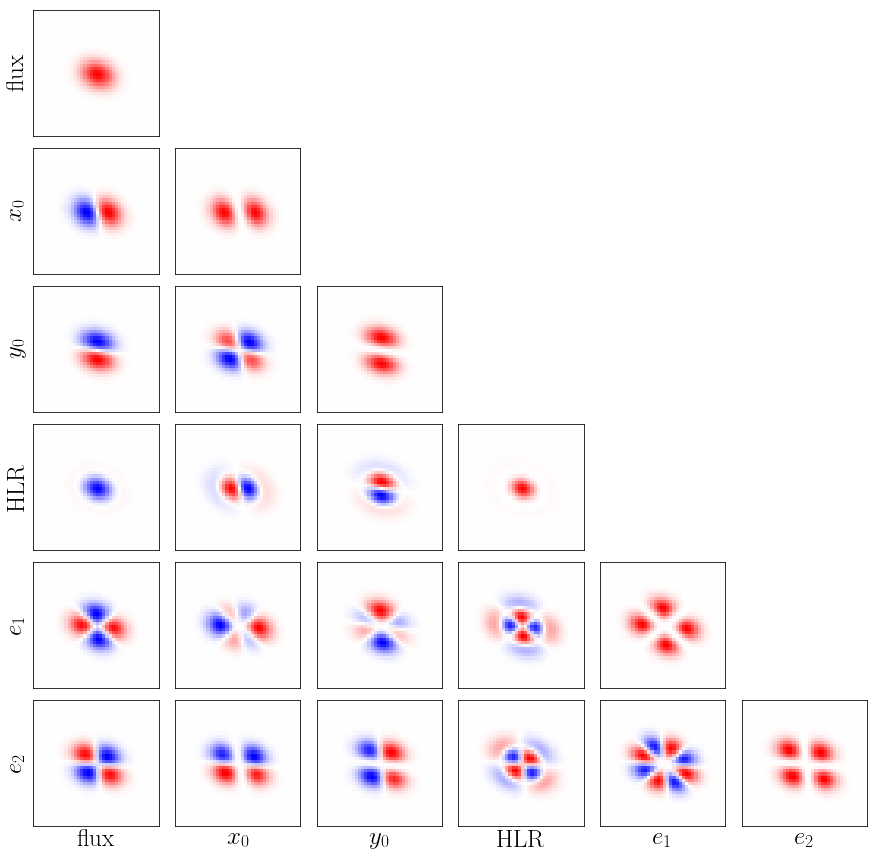

In [41]:
figure = plt.figure(figsize=(15,15))
# figure.suptitle('Fisher matrix elements',
#                 fontsize=20)
for i in range(fish.num_params):
    for j in range(fish.num_params):
        if i >= j:
            ax = figure.add_subplot(fish.num_params,
                                    fish.num_params,
                                    fish.num_params * i + j + 1)
            showImage(fish.fisher_matrix_images[
                          fish.param_names[i],
                          fish.param_names[j]
                      ],ax)
            
                 
            if j == 0: 
                plt.tick_params(
                axis='both',     
                which='both',      
                bottom='off',   
                top='off',        
                left='off',
                labelleft='off',
                right='off',
                labelbottom='off')
                plt.ylabel(latex_names[i],size=25)
            if i == fish.num_params-1: 
                plt.tick_params(
                axis='both',     
                which='both',      
                bottom='off',   
                top='off',        
                left='off',
                labelleft='off',
                right='off',
                labelbottom='off')
                plt.xlabel(latex_names[j],size=25)
            if i!= 0 and j!= fish.num_params-1: 
                plt.tick_params(
                axis='both',     
                which='both',      
                bottom='off',   
                top='off',        
                left='off',
                labelleft='off',
                right='off',
                labelbottom='off')
            plt.rc('text', usetex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.1, hspace=.1)
plt.savefig('/Users/Ismael/Desktop/fisher-elements.jpeg')



In [48]:
fish.fisher_matrix['e1_1','e1_1'] / (fish.fisher_matrix['e1_1','e1_1'] * fish.var_noise / (fish.var_noise + 1./2*fish.var_noise**2))

1.0000048730627169

### Display bias 

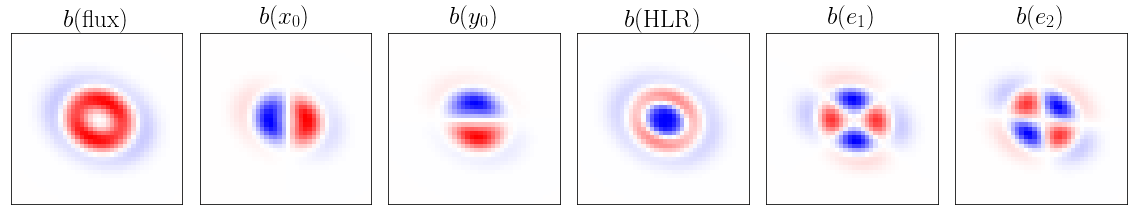

In [16]:
#draw bias images.
nrow,ncol = 1,6
fig = plt.figure(figsize=(20,20))
for i,name in enumerate(fish.param_names):
    image = fish.bias_images[name]
    plt.subplot(nrow,ncol,i+1)
    showImage(image)
    plt.title('$b(${0}$)$'.format(latex_names[i]),fontsize=25)
    #plt.colorbar()
    plt.tick_params(
    axis='both',     
    which='both',      
    bottom='off',   
    top='off',        
    left='off',
    labelleft='off',
    right='off',
    labelbottom='off')
    plt.rc('text', usetex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.1, hspace=.1)


## Pat's suggestion for new bias plot 

In [24]:
param_names = ['flux_1', 'x0_1',  'e1_1', 'hlr_1',  'y0_1',  'e2_1']
clatex_names= [r'$\rm{flux}$', '$x_{0}$', '$e_{1}$',r'$\rm{HLR}$','$y_{0}$','$e_{2}$']

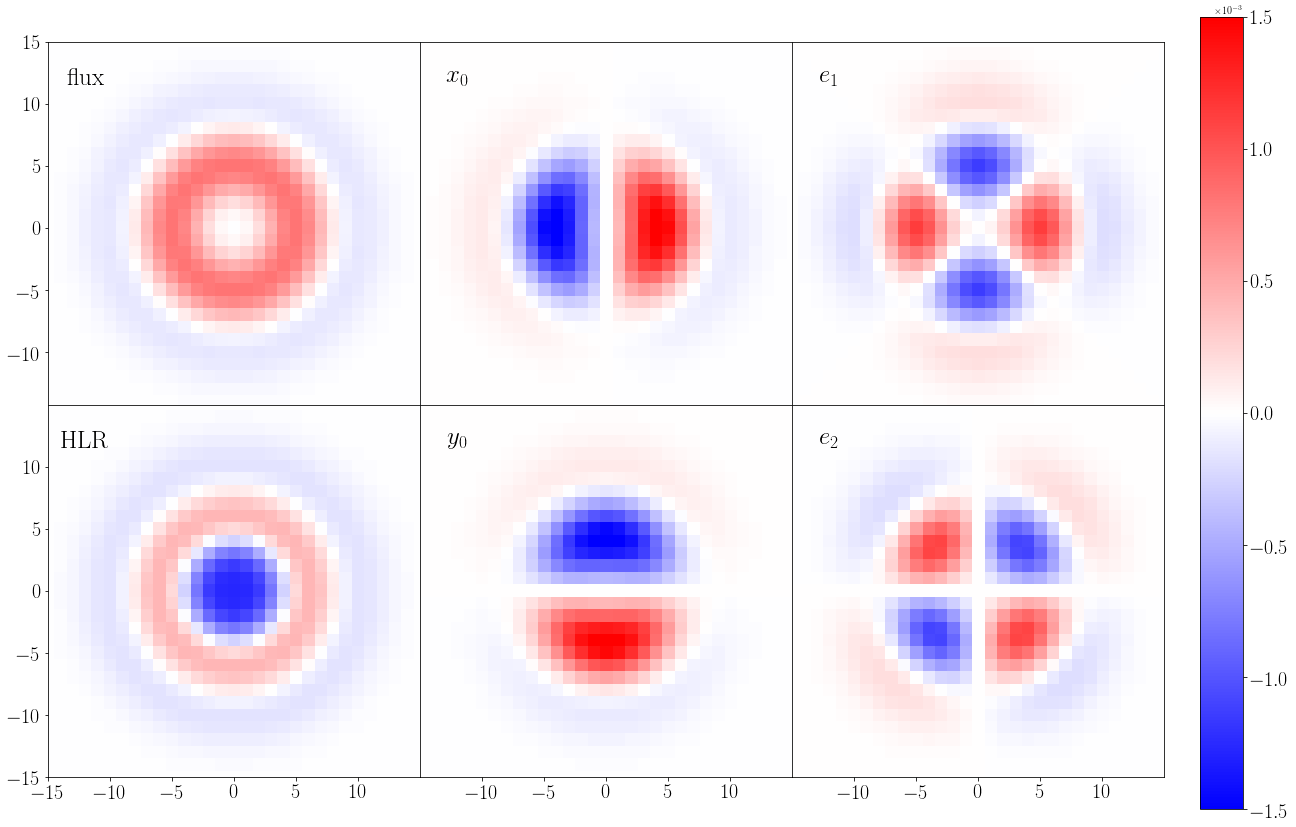

In [27]:
#draw bias images.
plt.rc('text', usetex=True)
from mpl_toolkits.axes_grid1 import make_axes_locatable

nrow,ncol = 2,3
fig = plt.figure(figsize=(20,20))
for i,name in enumerate(param_names):
    image = fish.bias_images[name] /np.sqrt(fish.covariance_matrix[name,name])
    ax = plt.subplot(nrow,ncol,i+1)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim((-15,15))
    plt.ylim((-15,15))

    if i==3: 
        plt.xticks([-15, -10, -5, 0, 5, 10], ['$-15$', '$-10$', '$-5$', '$0$', '$5$', '$10$'])
        
    else: 
        plt.xticks([-10, -5, 0, 5, 10], ['$-10$', '$-5$', '$0$', '$5$', '$10$'])
    
    if i==0: 
        plt.yticks([-10, -5, 0, 5, 10, 15], ['$-10$', '$-5$', '$0$', '$5$', '$10$', '$15$'])
    else: 
        plt.yticks([-15, -10, -5, 0, 5, 10], ['$-15$', '$-10$', '$-5$', '$0$', '$5$', '$10$'])
    

    
    if i == 0: 
        plt.tick_params(
        axis='both',     
        which='both',      
        bottom='off',   
        top='off',        
        left='on',
        labelleft='on',
        right='off',
        labelbottom='off')
    
    if i in [1,2]: 
        plt.tick_params(
        axis='both',     
        which='both',      
        bottom='off',   
        top='off',        
        left='off',
        labelleft='off',
        right='off',
        labelbottom='off')    
        
        
    if i in [4,5]: 
        plt.tick_params(
        axis='both',     
        which='both',      
        bottom='on',   
        top='off',        
        left='off',
        labelleft='off',
        right='off',
        labelbottom='on')  

    im = showImage(image,vmin=-.0015,vmax=.0015,extent=[-20.5,19.5,-19.5,20.5])
    plt.text(.1,.9,'${0}$'.format(clatex_names[i]),fontsize=25,ha='center', va='center', transform=ax.transAxes,fontweight='bold')
    
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    

#cbar = plt.colorbar(fraction=0.1, pad=0.14)
cbar_ax = fig.add_axes([0.925, 0.225, 0.03, 0.55])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20) 
#     cbar.ax.text(-0.25, 1, r'$\times$10$^{-3}$', va='top', ha='left')
cbar.formatter.set_powerlimits((0, 0))
cbar.update_ticks()
#cbar.ax.get_yaxis().labelpad = 35
#cbar.ax.set_ylabel(r'$b \, \frac{20.0}{SNR}$', rotation=270,size=40)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=-.5)
plt.savefig('/Users/Ismael/Desktop/new.jpg',bbox_inches='tight')



### Bias as a function of size 

In [20]:
# snr_norm = 20 #nominal snr to use. 
def bias_Size(fish,image_renderer,params, num_params):
    """Plot of bias*(snr_norm/snr)**2 as a function of hlr/psf_fwhm with a fixed snr."""
    
    plt.rc('text', usetex=True)

    steps = 25
    x_range = (.2, 1.5)  # x = hlr_gal / psf_fwhm
    xs = np.linspace(x_range[0], x_range[1], steps)
    figure = plt.figure(figsize=(FIG_SIZE, FIG_SIZE))
    id_params = deepcopy(fish.g_parameters.id_params)
    snr_norm = fish.snr #normally use 20.
#     figure.suptitle('Plot of ' + r'$b(a_{i})' + r'\left(' +
#                     str(snr_norm) + r'/\rm{SNR}\right)^{2}$' +
#                     'as a function of ' + r'hlr/fwhm$_{psf}$', fontsize=40)
    ys = {} # y= bias*snr^2
    for x in xs:
        gal_id = id_params.keys()[0]
        hlr = x * id_params[gal_id]['psf_fwhm']
        id_params[gal_id]['hlr'] = hlr
        g_parameters = galfun.GParameters(id_params=id_params)
        new_fish = fisher.Fisher(g_parameters,image_renderer, snr)
        biases = new_fish.biases
        for i,param in enumerate(params):
            if param not in ys:
                ys[param] = []
            bias = biases[param]
            y = bias
            ys[param].append(y)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.28, hspace=None)



    #do not plot x0 and y0
    extra = r'$\, \left(' + str(int(snr_norm)) + r'/\rm{SNR}\right)^{2}$'
    y_names = [r'$b(\rm{flux})$',
                r'$b(\rm{HLR})$', r'$b(e_{1})$',
                r'$b(e_{2})$']
    units = [r'$10^{-3}$',r'$10^{-2} \, \rm{arcseconds}$', '$10^{-2}$', '$10^{-2}$']
    y_titles = [elt + extra + '  [{0}]'.format(unit) for elt,unit in zip(y_names,units)]
    x_titles = [r'\rm{HLR/FWHM}$_{\rm{PSF}}$'] * 6
    ranges_x = [None,[0,1.6],[0,1.6],[0,1.6]]
    ranges_y = [[-1e-3,6e-3],None,None,None]
    for i,param in enumerate(params):
        ax = figure.add_subplot(2, num_params / 2,
                                i + 1)
        
        ax.plot(xs, ys[param],'-o',linewidth=LINE_WIDTH,markersize=MARKER_SIZE)
#         ax.scatter(xs,ys[param],s=40)
        
        ax.set_xticks(np.linspace(0,1.6,5)) 

        #ax.set_title(titles[i], fontsize=14)
        ax.set_xlabel(x_titles[i], fontsize=AXIS_LABEL_SIZE)
        ax.set_ylabel(y_titles[i], fontsize=AXIS_LABEL_SIZE)
        ax.tick_params(labelsize=AXIS_NUMBER_SIZE)
        
        
        ax.get_yaxis().get_offset_text().set_size(1)
        #scientic notation force.
        ax.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2))
        
        ax.tick_params(which='both', width=AXIS_WIDTH,length=AXIS_LENGTH)
        
        
        plt.axhline(0,color='r')
        if ranges_x[i] != None: plt.xlim(ranges_x[i])
        if ranges_y[i] != None: plt.ylim(ranges_y[i])
    
    plt.savefig('/Users/Ismael/Downloads/fig1.pdf')




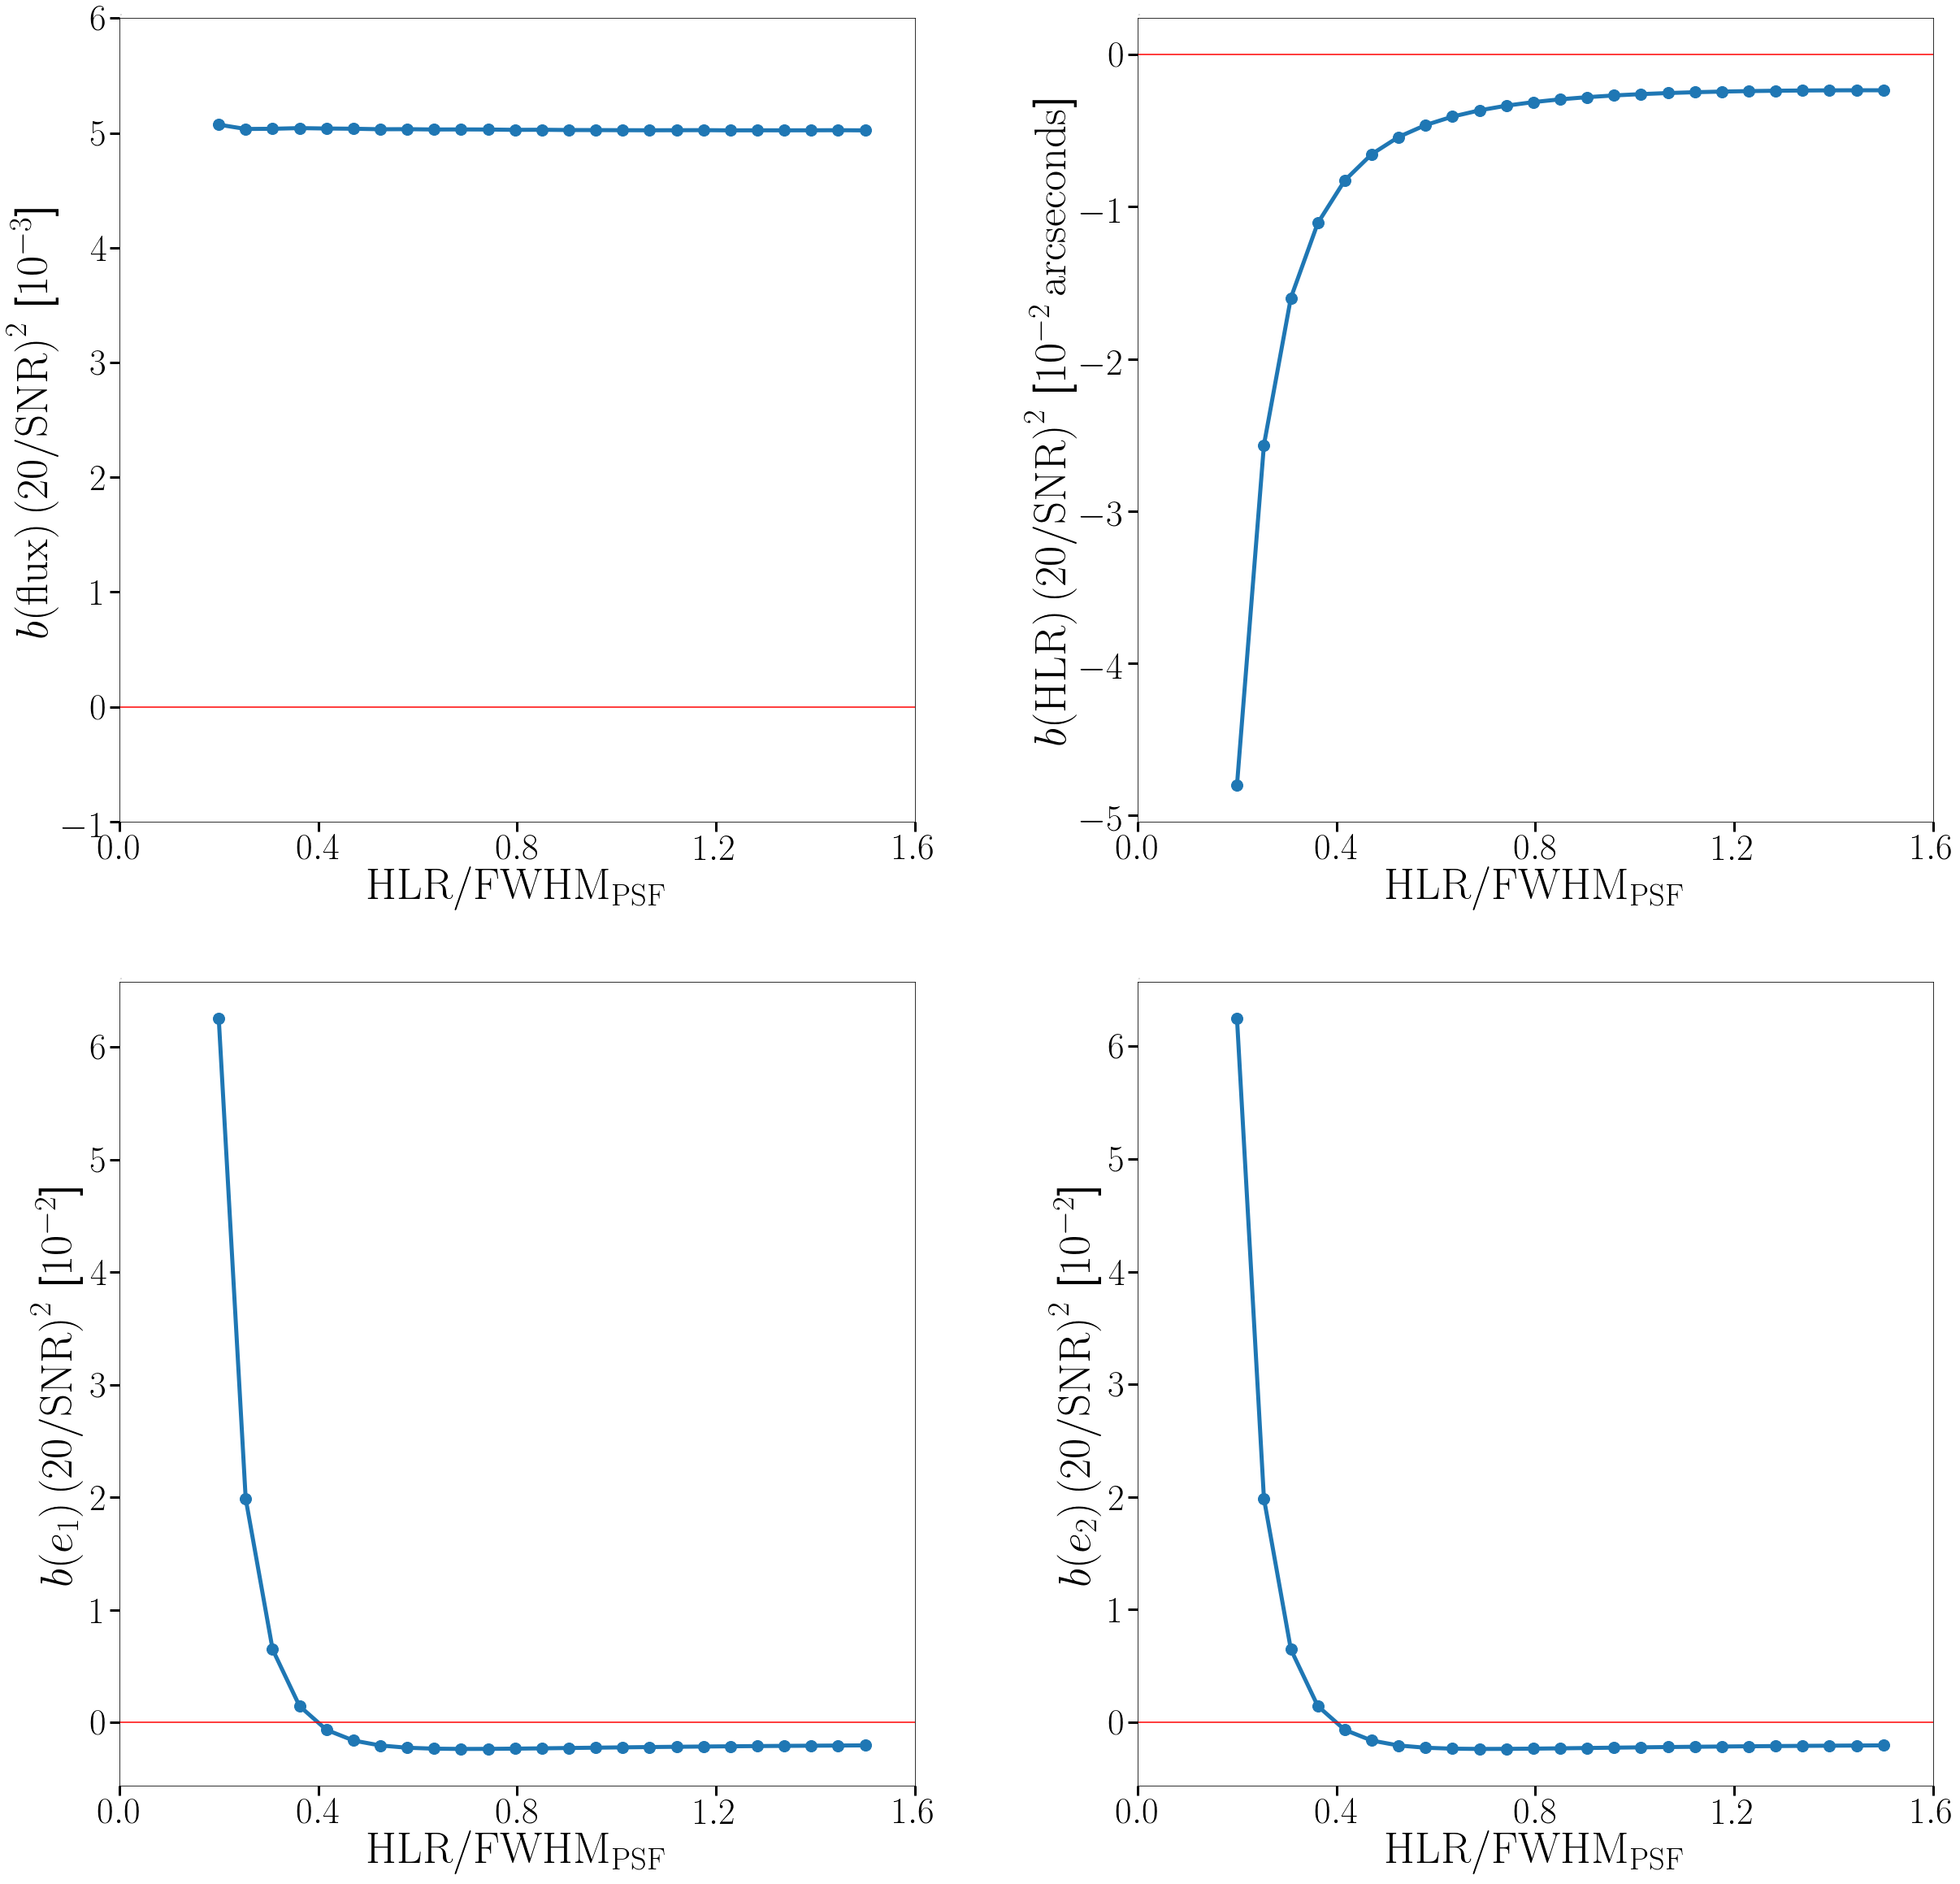

In [21]:
params = [fish.param_names[0]] + fish.param_names[3:] #want flux and not x0,y0
bias_Size(fish,image_renderer,params, fish.num_params-2)

### Bias as a function of ellpticity 

In [24]:
#bias on parameters as a function of a component of ellipticity.
snr_norm = 20
def bias_ellipticity(fish,image_renderer,params, num_params):
    """Plot of bias*(snr_norm/snr)**2 as a function of e1 (all other parameters fixed.)"""

    plt.rc('text', usetex=True)
    steps = 30
    x_range = (-.9, .9)  #x = e1 
    xs = np.linspace(x_range[0], x_range[1], steps)
    figure = plt.figure(figsize=(FIG_SIZE, FIG_SIZE))
    id_params = deepcopy(fish.g_parameters.id_params)
#     figure.suptitle('Plot of ' + r'$b(a_{i})' + r'\left(' +
#                     str(snr_norm) + r'/snr\right)^{2}$' +
#                     ' as a function of ' + r'$e_{1}$', fontsize=40)
    ys = {} # y= bias*snr2
    for x in xs:
        gal_id = id_params.keys()[0]
        id_params[gal_id]['e1'] = x
        g_parameters = galfun.GParameters(id_params=id_params)
        fish = fisher.Fisher(g_parameters,image_renderer, snr)
        biases = fish.biases
        for i,param in enumerate(params):
            if param not in ys:
                ys[param] = []
            bias = biases[param]
            ys[param].append(bias)


    #do not plot x0 and y0
    units = ['$10^{-2}$',r'$10^{-3}$\,$\rm{arcseconds}$', '$10^{-3}$', '$10^{-3}$']
    extra = r'$\, \left(' + str(snr_norm) + r'/\rm{SNR}\right)^{2}$'
    y_names = [r'$b(\rm{flux})$',
                r'$b(\rm{HLR})$', r'$b(e_{1})$',
                r'$b(e_{2})$']
    y_titles = [elt + extra + "  [{0}]".format(unit) for (elt,unit) in zip(y_names,units)]
    x_titles = [r'$e_{1}$'] * 4
    for i,param in enumerate(params):
        ax = figure.add_subplot(2, num_params / 2,
                                i + 1)
        ax.plot(xs, ys[param],'-o', markersize=MARKER_SIZE,linewidth=LINE_WIDTH)
        #ax.set_title(titles[i], fontsize=14)
        ax.set_xlabel(x_titles[i], fontsize=AXIS_LABEL_SIZE)
        ax.set_ylabel(y_titles[i], fontsize=AXIS_LABEL_SIZE)
        ax.tick_params(labelsize=AXIS_NUMBER_SIZE)
        ax.tick_params(which='both', width=AXIS_WIDTH,length = AXIS_LENGTH)
        
        ax.set_xticks(np.linspace(-.9,.9,5)) 

        ax.get_yaxis().get_offset_text().set_size(1)
        #scientic notation force.
        ax.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2))
        plt.axhline(0,color='r')


    plt.savefig('/Users/Ismael/Downloads/fig2.pdf')




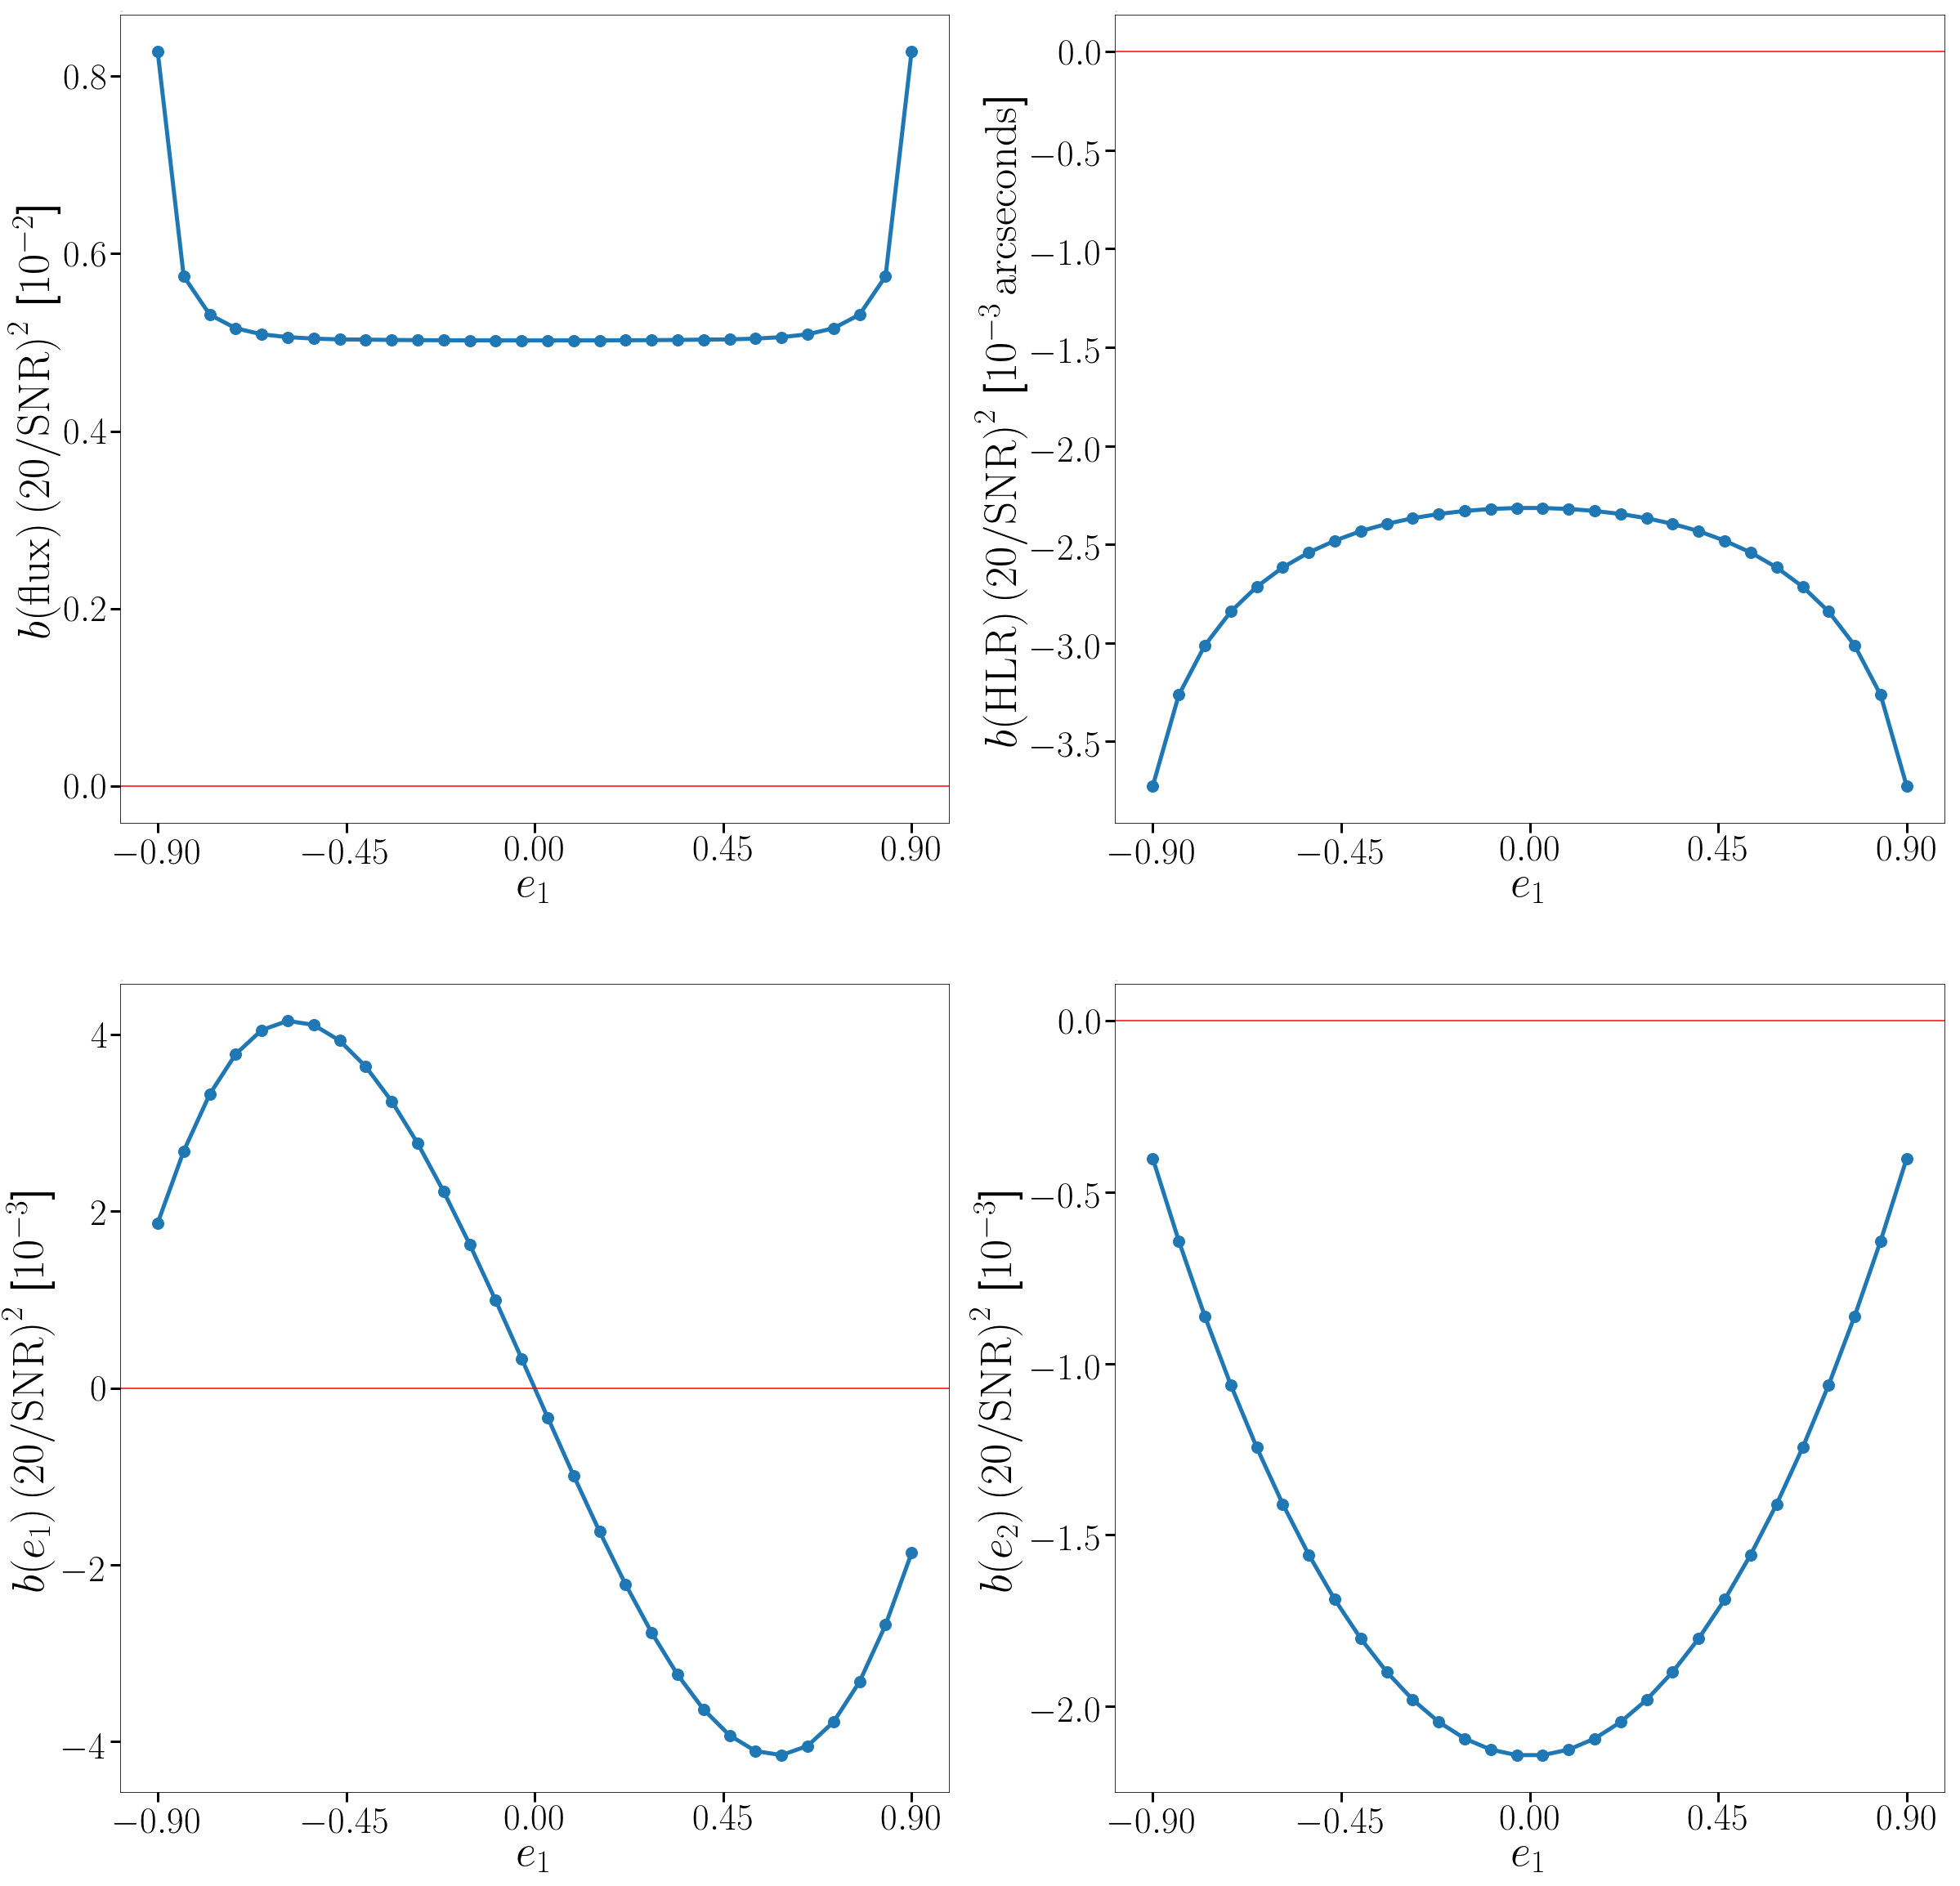

In [25]:
params = [fish.param_names[0]] + fish.param_names[3:] #want flux and not x0,y0
bias_ellipticity(fish,image_renderer,params, fish.num_params-2)

### Try to reproduce Hirata's results

In [ ]:
#get trace as defined in paper pg.4
def getTraceSecondMoments(e1,e2,sigma)
    e_mag = np.sqrt(e1**2+e2**2)
    return 2*sigma**2/np.sqrt(1-e_mag**2)


#function to caculate resolution factor 
def getR2(fish): 
    psf = galsim.Gaussian(fwhm=fish.g_parameters.params['psf_fwhm_1'])
    psf_sigma = psf.getSigma()
    gal = galsim.Gaussian(fwhm=fish.g_parameters.params['hlr_1'])
    gal_sigma = gal.getSigma()
    
    Tp = getTraceSecondMoments(0,0,psf_sigma)
    Ti = getTraceSecondMoments(fish.g_parameters.params['e1_1'],fish.g_parameters.params['e2_1'],gal_sigma)
    

### Check our ellipses do what we want in our galaxies 

In [59]:
fish.g_parameters.id_params

{'1': {'e1': 0.2,
  'e2': 0.2,
  'flux': 1.0,
  'galaxy_model': 'gaussian',
  'hlr': 1.0,
  'psf_flux': 1.0,
  'psf_fwhm': 0.7,
  'psf_model': 'psf_gaussian',
  'x0': 0.0,
  'y0': 0.0}}

In [63]:
def get_ellipse_params(e1,e2,hlr): 
    e = np.sqrt(e1**2 + e2**2)
    q = np.sqrt((1 - e)/( 1+ e)) 
    b = np.sqrt(q * hlr**2)  # assuming that hlr = np.sqrt(a * b) 
    a = b/q 

    #set the angles
    if e == 0: 
        theta = 0. 

    else: 
        theta= 45.
        
    return a,b, theta


def count_pixels_out_in(a,b, theta,x0,y0,fish,image_renderer):
    count_in= 0. 
    count_out = 0. 
    cos_angle = np.cos(np.radians(180.-theta))
    sin_angle = np.sin(np.radians(180.-theta))
    image_dim = fish.image.array.shape[0]
    print theta
    ell= Ellipse(xy=(x0,y0), width=a*2/pixel_scale, height=b*2/pixel_scale, angle=theta,facecolor='none',edgecolor='b', lw=4)


    
    
    for i in range(fish.image.array.shape[0]): 
        for j in range(fish.image.array.shape[1]):
            pixel = np.array([i,j])
            pixel_value = fish.image.array[(i,j)]
            pixel_center = pixel - image_dim/2 
            xc = pixel_center[0]
            yc = pixel_center[1]
            xct = xc * cos_angle - yc * sin_angle
            yct = xc * sin_angle + yc * cos_angle 
            rad_cc = (xct**2/(a/image_renderer.pixel_scale)**2) + (yct**2/(b/image_renderer.pixel_scale)**2)

            if rad_cc <= 1.: 
                count_in+=1
            else: 
                count_out+=1
    return count_in,count_out,ell

0.0
count_in 1 81.0
count_out 1 1519.0
0.0
count_in 2 317.0
count_out 2 1283.0


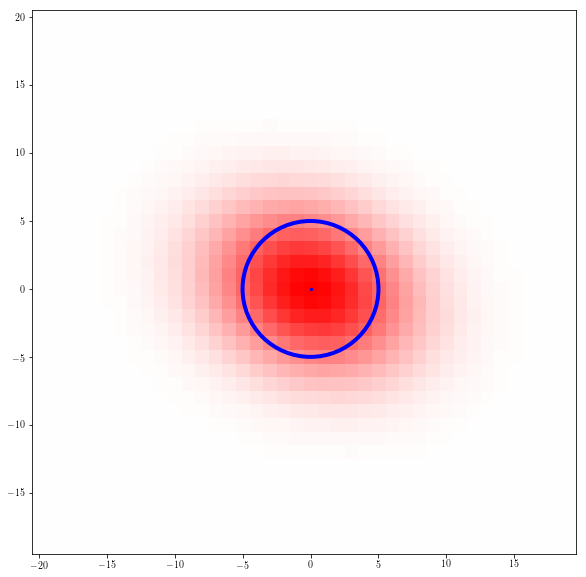

In [76]:
## we want half the points to be inside the ellipse and half outside 
e1 = 0
e2 =0
hlr =  fish.g_parameters.id_params['1']['hlr']

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)





x0,y0 = 0,0
#count for things inside hlr, 
a,b,theta = get_ellipse_params(e1,e2,hlr)

count_in,count_out,ell_1 = count_pixels_out_in(a,b,theta,x0,y0,fish,image_renderer)

print 'count_in 1', count_in
print 'count_out 1', count_out

ax.add_artist(ell_1)


#count for things inside 2*hlr, 
a,b,theta = get_ellipse_params(e1,e2,2*hlr)

count_in,count_out,ell_2 = count_pixels_out_in(a,b,theta,x0,y0,fish,image_renderer)

print 'count_in 2', count_in
print 'count_out 2', count_out
# ax.add_artist(ell_2)

ax.scatter([0],[0],s=5,color='blue')

showImage(fish.image.array,ax=ax,extent=[-20.5,19.5,-19.5,20.5])









In [65]:
fish.g_parameters.id_params

{'1': {'e1': -0.2,
  'e2': 0,
  'flux': 1.0,
  'galaxy_model': 'gaussian',
  'hlr': 1.0,
  'psf_flux': 1.0,
  'psf_fwhm': 0.7,
  'psf_model': 'psf_gaussian',
  'x0': 0.0,
  'y0': 0.0}}

## Plots producing galaxy with different ellipticities

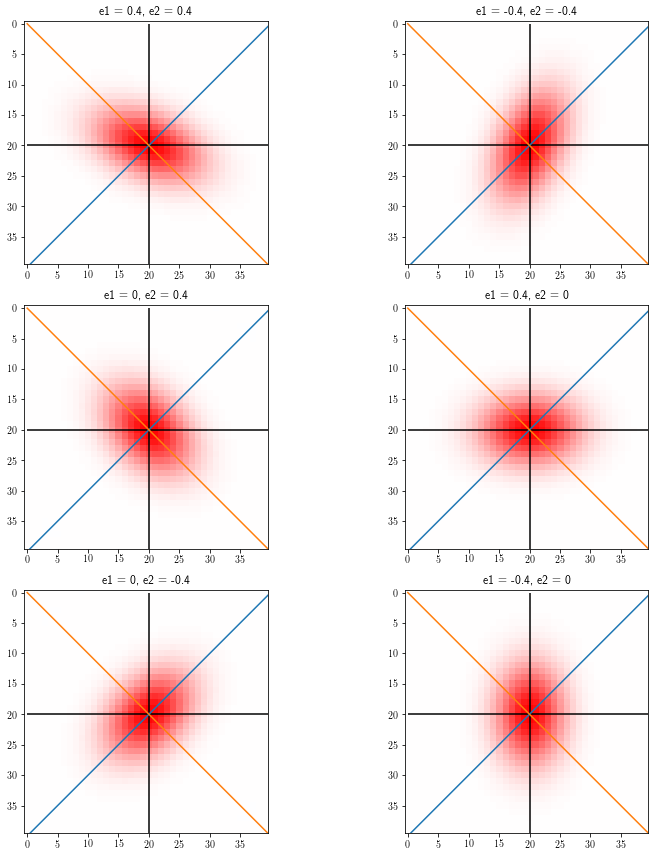

In [77]:
fig = plt.figure(figsize=(12,12))

for i,(e1,e2) in enumerate([(.4,.4),(-.4,-.4),(0,.4),(.4,0),(0,-.4),(-.4,0)]):
    ax = fig.add_subplot(3,2,i+1)
    id_params = deepcopy(fish.g_parameters.id_params)
    ids = id_params.keys()
    id1 = ids[0]

    id_params[id1]['e1'] = e1
    id_params[id1]['e2'] = e2

    g_parameters_new = galfun.GParameters(id_params=id_params)
    fish_new = fisher.Fisher(g_parameters, image_renderer, snr)
    
    ax.set_title('e1 = {}, e2 = {}'.format(e1,e2))
    plt.hlines(20,0,40)
    plt.vlines(20,0,40)
    ax.plot((0, 40), (40, 0))
    ax.plot((0, 40), (0, 40))



    
    showImage(fish.image.array)
plt.tight_layout()

## Plots for two galaxies 

In [82]:
#parameters of first galaxy to draw. we assume that both galaxies have same psf and snr (which only depends on the background) throughout. 

model_1 = 'gaussian' #possible options of model and psf_model are in documentation. 
e1_1 = 0.2
e1_2 = 0.2
hlr_1 = .5
flux_1 = 1. 
x0_1 = 2 #this is in arcsecs.  
y0_1 = 0. 

#parameters of second galaxy to draw. 
model_2 = 'gaussian'  
e2_1 = -0.2
e2_2 = -0.2
hlr_2 = .5
flux_2 = 1. 
x0_2 = -2
y0_2 = 0.

#general parameters
snr = 20. 
psf_fwhm = .7
psf_model = 'psf_gaussian'


#project folder name where you want to write galaxy information 
project2 = 'project-tutorial2'

#image parameters 
pixel_scale=.2 
nx = 40
ny = 40

In [39]:
cmd1 = 'python generate.py -p {0} -gal 1 --galaxy-model {1} --psf_model {2}  --e1 {3} --e2 {4} --x0 {5} --y0 {6} \
--flux {7} --psf_flux 1. --hlr {8} --psf_fwhm {9} --snr {10}'.format(project2,model_1,psf_model,e1_1,e1_2,x0_1,y0_1,flux_1,hlr_1,psf_fwhm,snr)
p1 = Popen(cmd1, shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True)
output1 = p1.stdout.read()
print output1

In [40]:
cmd2 = 'python generate.py -p {0} -gal 2 --galaxy-model {1} --psf_model {2}  --e1 {3} --e2 {4} --x0 {5} --y0 {6} \
--flux {7} --psf_flux 1. --hlr {8} --psf_fwhm {9} --snr {10}'.format(project2,model_2,psf_model,e2_1,e2_2,x0_2,y0_2,flux_2,hlr_2,psf_fwhm,snr)
p2 = Popen(cmd2, shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True)
output2 = p2.stdout.read()
print output2



### Read galaxies data, 


In [83]:
import analysis.fisher as fisher
import analysis.galfun as galfun

In [84]:
#works the same way as before, 
g_parameters = galfun.GParameters(project2) #extract parameters from file created by generate.py 
image_renderer = galfun.ImageRenderer(pixel_scale=pixel_scale,
                                      nx=nx,ny=ny)
fish = fisher.Fisher(g_parameters=g_parameters,image_renderer=image_renderer, 
                     snr=snr)

### Draw the galaxies 

In [18]:
print fish.biases['e1_1']
print fish.biases['e1_2']
print fish.biases['e2_1']
print fish.biases['e2_2']
print 'varnoise',fish.var_noise
print 'invariant?', fish.biases['e1_2'] / fish.var_noise

-0.00235983
0.00234779
-0.00235923
0.00235995
varnoise 2.8977568727e-05
invariant? 81.0207901142


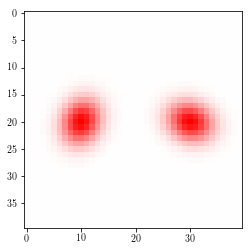

In [39]:
#get galaxy image and display it from fisher object. green is positive and red is negative 
showImage(fish.image.array)



-0.5

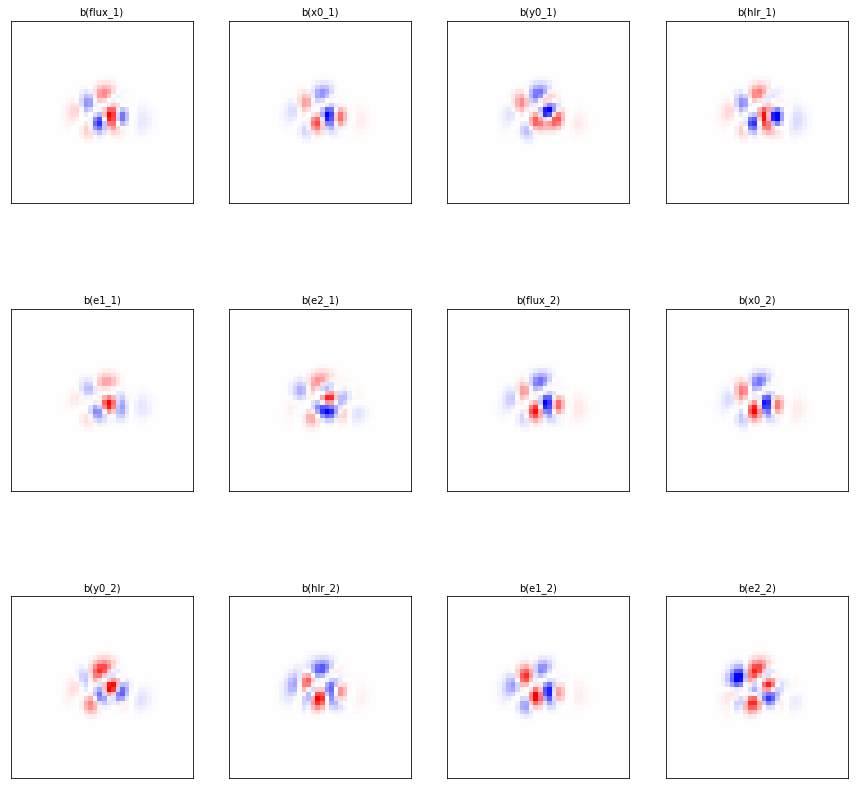

In [49]:
#draw bias images.
plt.rc('text', usetex=False)
nrow,ncol = 3,4
fig = plt.figure(figsize=(15,15))
for i,name in enumerate(fish.param_names):
    image = fish.bias_images[name]
    plt.subplot(nrow,ncol,i+1)
    showImage(image)
    plt.title('b({})'.format(name),fontsize=10)
    #plt.colorbar()
    plt.tick_params(
    axis='both',     
    which='both',      
    bottom='off',   
    top='off',        
    left='off',
    labelleft='off',
    right='off',
    labelbottom='off')
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.1, hspace=.1)



### Bias as a function of distance between the two 

In [22]:
#assume both have y = 0
def biasSeparation(fish,image_renderer,params,num_params):
    separation_range = (-6., 6.)  # arcsecs.
    steps = 10
    figure = plt.figure(figsize=(FIG_SIZE, FIG_SIZE))
    figure.suptitle('Bias as a function of distance between two galaxies')
    id_params = deepcopy(fish.g_parameters.id_params)
    snr = fish.snr
    var_noise = fish.var_noise 
    separations = np.linspace(separation_range[0], separation_range[1],
                              steps)
    biases = {}
    for separation in separations:
        pos1 = separation / 2
        pos2 = -separation / 2
        ids = id_params.keys()
        id1 = ids[0]
        id2 = ids[1]
        id_params[id1]['x0'] = pos1
        id_params[id2]['x0'] = pos2
        g_parameters = galfun.GParameters(id_params=id_params)
        #important: set the var_noise here to the one obtained when they are far apart. 8
        fish = fisher.Fisher(g_parameters, image_renderer, snr,var_noise=var_noise) 
        for i in range(num_params):
            param = params[i]
            if param not in biases:
                biases[param] = []
            bias = fish.biases[param]
            biases[param].append(bias)


    y_titles = [r'$b(e^{1}_{1})$',
               r'$b(e^{1}_{2})$',
               r'$b(e^{2}_{1})$',
               r'$b(e^{2}_{2})$']
    x_titles = [r'$x^{1}_{0} - x^{2}_{0}$ [arcsecs]'] * 4
    units = ['$[10^{-1}]$','$[10^{-2}]$', '[$10^{-1}$]', '$[10^{-1}]$']
    
    y_final_titles = [y_title + ' {0}'.format(unit) for y_title,unit in zip(y_titles,units)]



    for i in range(num_params):
        plt.rc('text', usetex=True)
        param = params[i]
        ax = figure.add_subplot(2, num_params / 2,
                                i + 1)
        ax.plot(separations, biases[param],'-o',linewidth=LINEWIDTH)
        ax.scatter(separations,biases[param],s=40)
#         ax.scatter(separations, biases[param])
#         ax.errorbar(separations, biases[param])
        #ax.set_title(titles[i], fontsize=14)
        ax.set_xlabel(x_titles[i], fontsize=AXIS_LABEL_SIZE)
        ax.set_ylabel(y_final_titles[i], fontsize=AXIS_LABEL_SIZE)
        ax.tick_params(labelsize=AXIS_NUMBER_SIZE)
        ax.tick_params(which='both', width=AXIS_WIDTH,length = AXIS_LENGTH)
        plt.axhline(0,color='r')
        
        ax.get_yaxis().get_offset_text().set_size(80)
        #scientic notation force.
        ax.ticklabel_format(style='sci', axis='y', scilimits=(-2,2))

    figure.subplots_adjust(wspace=.3)
    


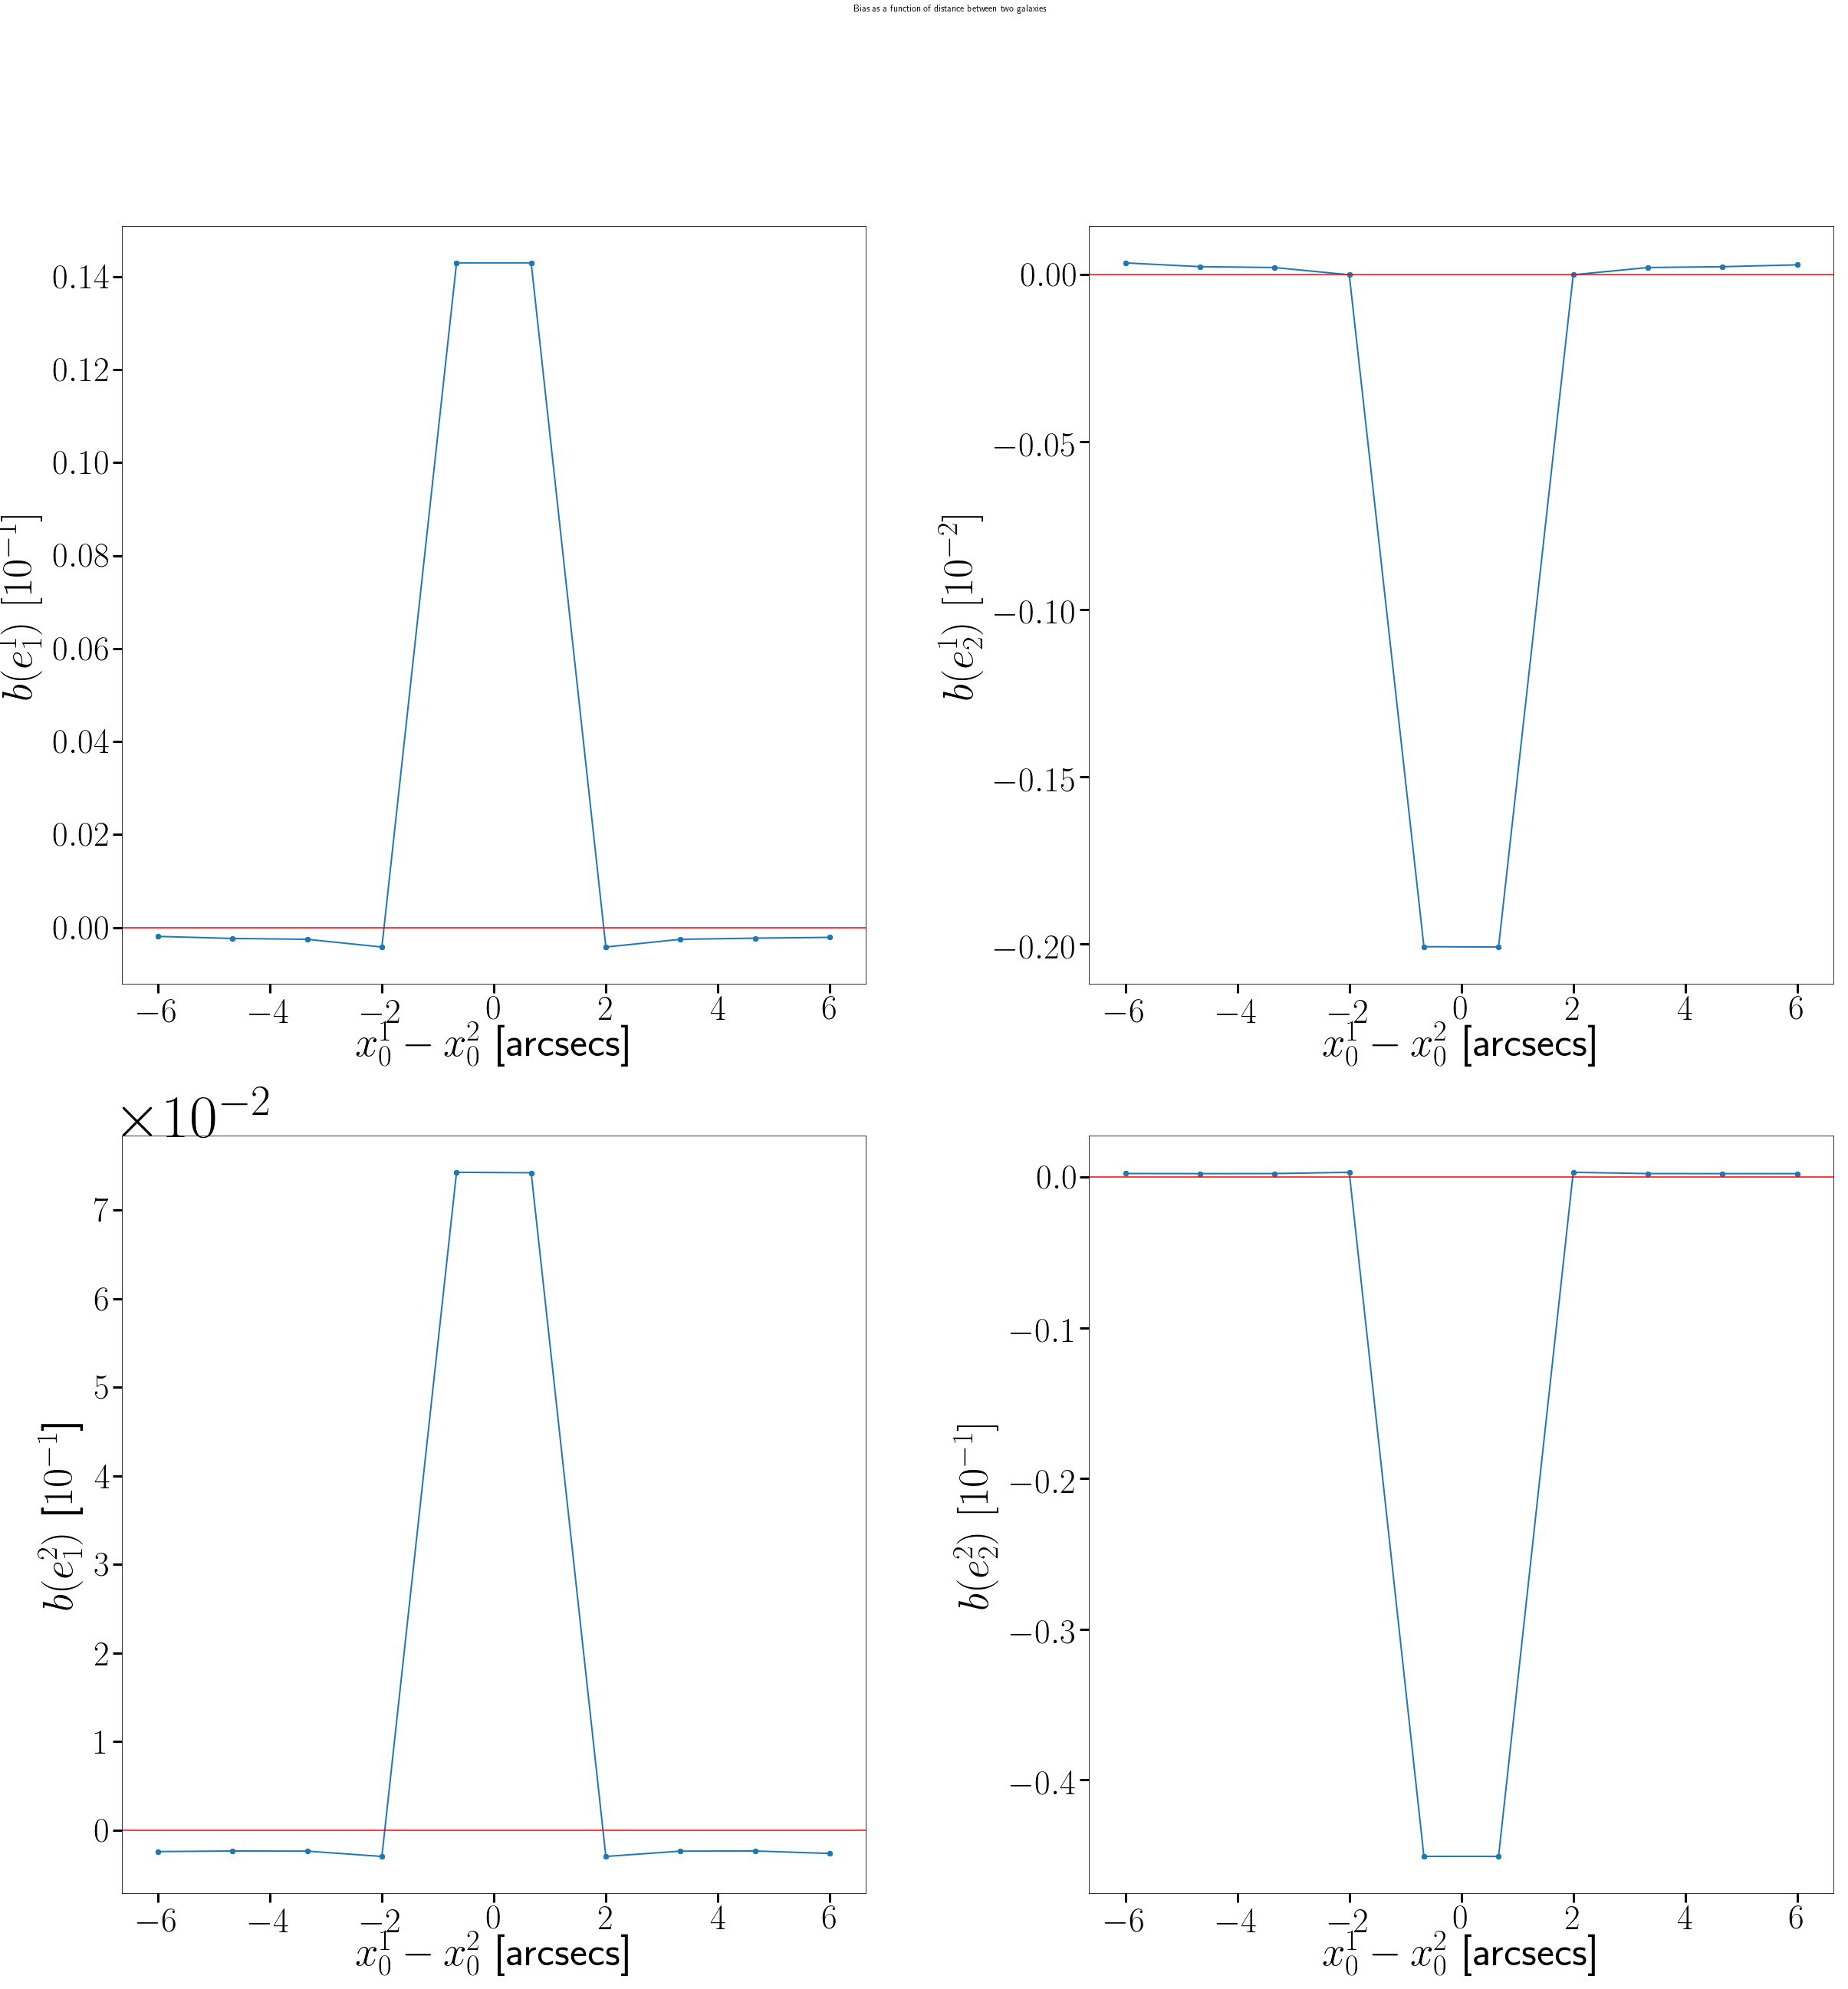

In [23]:
biasSeparation(fish,image_renderer,['e1_1','e1_2','e2_1','e2_2'],4)

### Produce the plot that uses the 3 different ellipticities .

In [30]:
fish.g_parameters.id_params

{'1': {'e1': 0.2,
  'e2': 0.2,
  'flux': 1.0,
  'galaxy_model': 'gaussian',
  'hlr': 0.5,
  'psf_flux': 1.0,
  'psf_fwhm': 0.7,
  'psf_model': 'psf_gaussian',
  'x0': 2.0,
  'y0': 0.0},
 '2': {'e1': -0.2,
  'e2': -0.2,
  'flux': 1.0,
  'galaxy_model': 'gaussian',
  'hlr': 0.5,
  'psf_flux': 1.0,
  'psf_fwhm': 0.7,
  'psf_model': 'psf_gaussian',
  'x0': -2.0,
  'y0': 0.0}}

In [106]:
#assume both have y = 0
def biasSeparationThree(fish,image_renderer,params,num_params):
    plt.rc('text', usetex=True)
    separation_range = (.7, 2.)  # arcsecs.
    steps = 20
    separations = np.linspace(separation_range[0],separation_range[1],steps)
  

        
#         ax.get_yaxis().get_offset_text().set_size(80)
#         #scientic notation force.
#         ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

        
    labels = ['1','2','3','4']
    #(hlr1,hl2),(e11,e12,e21,e22)
    parameters = [((.5,1.),(0.,0.,0.,0.)),
                  ((.5,1.),(0.2,0.2,0.2,0.2)),
                  ((.5,1.),(0.2,0.2,-0.2,-0.2)),
                  ((.5,.5),(0.2,0.2,-0.2,-0.2))
                 ]
    
    #plot the types of galaxies: 
    num_plots = len(parameters)
    figure = plt.figure(figsize=(FIG_SIZE, FIG_SIZE))
    for i,(label,(hlrs,ellipticities)) in enumerate(zip(labels,parameters)):
        ax = figure.add_subplot(1, num_plots, i + 1)
        
        if i == 0: 
            plt.tick_params(
            axis='both',     
            which='both',      
            bottom='on',   
            top='off',        
            left='on',
            labelleft='on',
            right='off',
            labelbottom='on')
            
        else: 
            plt.tick_params(
            axis='both',     
            which='both',      
            bottom='on',   
            top='off',        
            left='off',
            labelleft='off',
            right='off',
            labelbottom='on')

        hlr1,hlr2 = hlrs 
        e1_1,e2_1,e1_2,e2_2 = ellipticities
        
        id_params = deepcopy(fish.g_parameters.id_params)
        ids = id_params.keys()
        id1 = ids[0]
        id2 = ids[1]
        id_params[id1]['hlr'] = hlr1
        id_params[id2]['hlr'] = hlr2
        id_params[id1]['e1'] = e1_1
        id_params[id1]['e2'] = e2_1
        id_params[id2]['e1'] = e1_2
        id_params[id2]['e2'] = e2_2
        
        #adjust centers to maximum distance 
        id_params[id1]['x0'] = -2.
        id_params[id2]['x0'] = 2.
        id_params[id1]['y0'] = 0.
        id_params[id2]['y0'] = 0.


        
        g_parameters = galfun.GParameters(id_params=id_params)
        fish = fisher.Fisher(g_parameters, image_renderer, snr)
        
        print 'the snrs are: {}'.format(fish.snrs)
        
        ax.text(0.5, 0.8, label,
                transform=ax.transAxes,fontsize=60)
        
        ax.text(0.225, 0.225, 'a',
                transform=ax.transAxes,fontsize=60)
        
        ax.text(0.75, 0.225, 'b',
                transform=ax.transAxes,fontsize=60)
        
        #add ellipse to guide eye. 
        pixel_scale = image_renderer.pixel_scale
        
        #first get semi-major and semi-minor axis 
        #sigma1 = galsim.Gaussian(hlr1).getSigma() #assuming a gaussian galaxy with hlr what is the sigma? 
        #sigma2 = galsim.Gaussian(hlr2).getSigma() 
        e1 = np.sqrt(e1_1**2 + e2_1**2)
        e2 = np.sqrt(e1_2**2 + e2_2**2)
        q1 = np.sqrt((1 - e1)/( 1+ e1)) 
        q2 = np.sqrt((1 - e2)/( 1+ e2))
        b1 = np.sqrt(q1 * hlr1**2)  # assuming that hlr = np.sqrt(a * b) 
        b2 = np.sqrt(q2 * hlr2**2)
        a1 = b1/q1 
        a2 = b2/q2 
        
        
        #set the angles
        if e1 == 0: 
            theta1 = 0. 
        if e2 == 0: 
            theta2 = 0. 
        
        if e1_1 > 0 : 
            theta1= 360 - 22.5 
        if e1_2 > 0: 
            theta2= 360 - 22.5
        else: 
            theta2 = 90 - 22.5 
                
        ell_1 = Ellipse(xy=(-10,0), width=a1*2/pixel_scale, height=b1*2/pixel_scale, angle=theta1,facecolor='none',edgecolor='b', lw=4)
        ell_2 = Ellipse(xy=(10,0), width=a2*2/pixel_scale, height=b2*2/pixel_scale, angle=theta2,facecolor='none',edgecolor='b', lw=4)

        ax.add_artist(ell_1)
        ax.add_artist(ell_2)


        
        plt.xlim((-20,20))
        plt.ylim((-20,20))
        showImage(fish.image.array,ax,vmin=None,vmax=None,extent=[-20.5,19.5,-19.5,20.5])
        plt.tick_params(axis='both', which='major', labelsize=35)
        plt.xticks([-15,-10, -5, 0, 5, 10, 15],['$-15$','$-10$', '$-5$', '$0$', '$5$', '$10$', '$15$'])
        
        

    plt.tight_layout()        
    plt.savefig('/Users/Ismael/Desktop/separation-plot1.jpeg')
        
    #now plot the ellipticity bias as a function of the distance between the two: 
    figure = plt.figure(figsize=(FIG_SIZE, FIG_SIZE))
    y_titles = [r'$b(e^{a}_{1})$',
               r'$b(e^{b}_{1})$',
               r'$b(e^{a}_{2})$',
               r'$b(e^{b}_{2})$']
    x_titles = [r'$|x^{a}_{0} - x^{b}_{0}|$ [$\rm{arcsecs}$]'] * 4
    #units = ['$[10^{-1}]$','$[10^{-2}]$', '[$10^{-2}$]', '$[10^{-1}]$']
    units = ['','', '', '']
    y_final_titles = [y_title + ' {0}'.format(unit) for y_title,unit in zip(y_titles,units)]
    
    axes = []
    for i in range(num_params): 
        axes.append(figure.add_subplot(2, num_params / 2, i + 1))
        plt.axhline(0,color='purple')


    
    for i,ax in enumerate(axes): 
        plt.rc('text', usetex=True)
        param = params[i]
        ax.set_xlabel(x_titles[i], fontsize=AXIS_LABEL_SIZE)
        ax.set_ylabel(y_final_titles[i], fontsize=AXIS_LABEL_SIZE)
        ax.tick_params(labelsize=AXIS_NUMBER_SIZE)
        ax.tick_params(which='both', width=AXIS_WIDTH,length = AXIS_LENGTH)
        #plt.xticks([.7, .9, 1.1, , 10], ['$-10$', '$-5$', '$0$', '$5$', '$10$'])
    
    for i,(label,(hlrs,ellipticities)) in enumerate(zip(labels,parameters)):
        hlr1,hlr2 = hlrs 
        e1_1,e2_1,e1_2,e2_2 = ellipticities

        
        id_params = deepcopy(fish.g_parameters.id_params)
        ids = id_params.keys()
        id1 = ids[0]
        id2 = ids[1]
        id_params[id1]['hlr'] = hlr1
        id_params[id2]['hlr'] = hlr2
        id_params[id1]['e1'] = e1_1
        id_params[id1]['e2'] = e2_1
        id_params[id2]['e1'] = e1_2
        id_params[id2]['e2'] = e2_2
        biases = {}
        for separation in separations:
            pos1 = -separation / 2
            pos2 = separation / 2
            id_params[id1]['x0'] = pos1
            id_params[id2]['x0'] = pos2
            g_parameters = galfun.GParameters(id_params=id_params)
            fish = fisher.Fisher(g_parameters, image_renderer, snr)
            for i in range(num_params):
                param = params[i]
                if param not in biases:
                    biases[param] = []
                bias = fish.biases[param]
                biases[param].append(bias)

        for i,ax in enumerate(axes):
            param = params[i]
            ax.plot(separations, biases[param],'-o',linewidth=3,markersize=12,label=label)
            #ax.get_yaxis().get_offset_text().set_size(80)
            #scientic notation force.
            #ax.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2))
            legend = ax.legend(loc='best', fontsize=40)

    figure.subplots_adjust(wspace=.3)
    plt.tight_layout()                  
    plt.savefig('/Users/Ismael/Desktop/separation-plot2.jpeg')

the snrs are: [20.0, 11.5608162173652]
the snrs are: [20.0, 11.578960698964316]
the snrs are: [20.0, 11.595411183757053]
the snrs are: [20.0, 20.000000803485246]


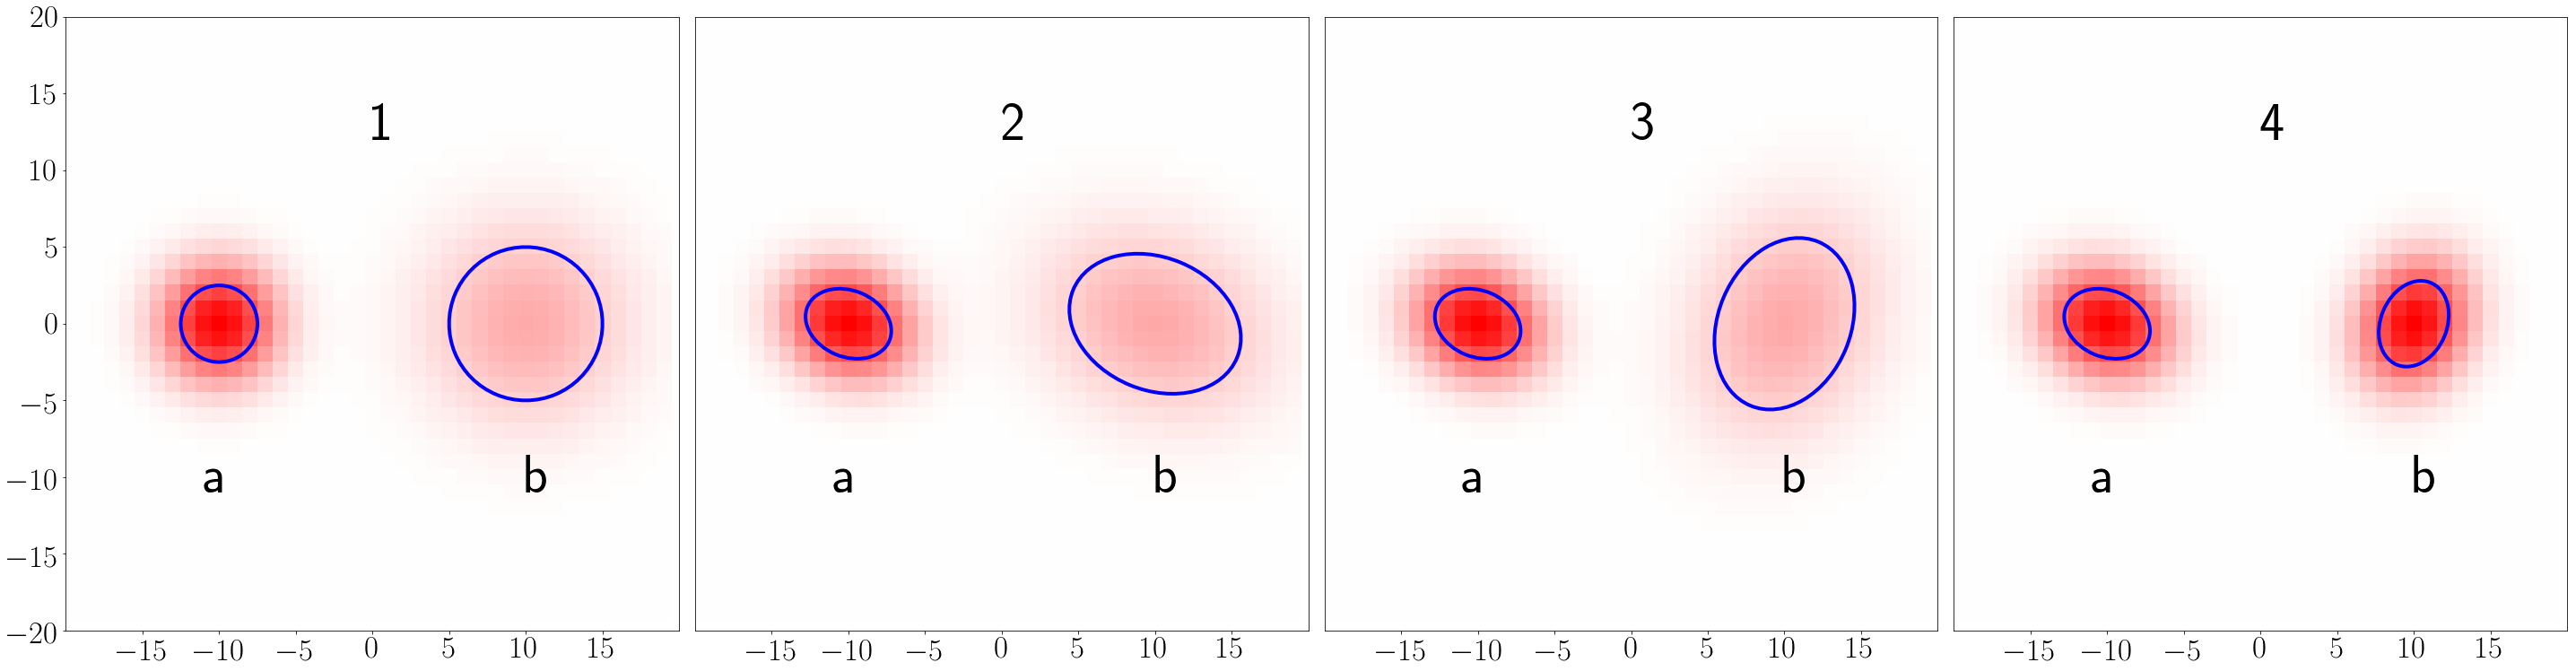

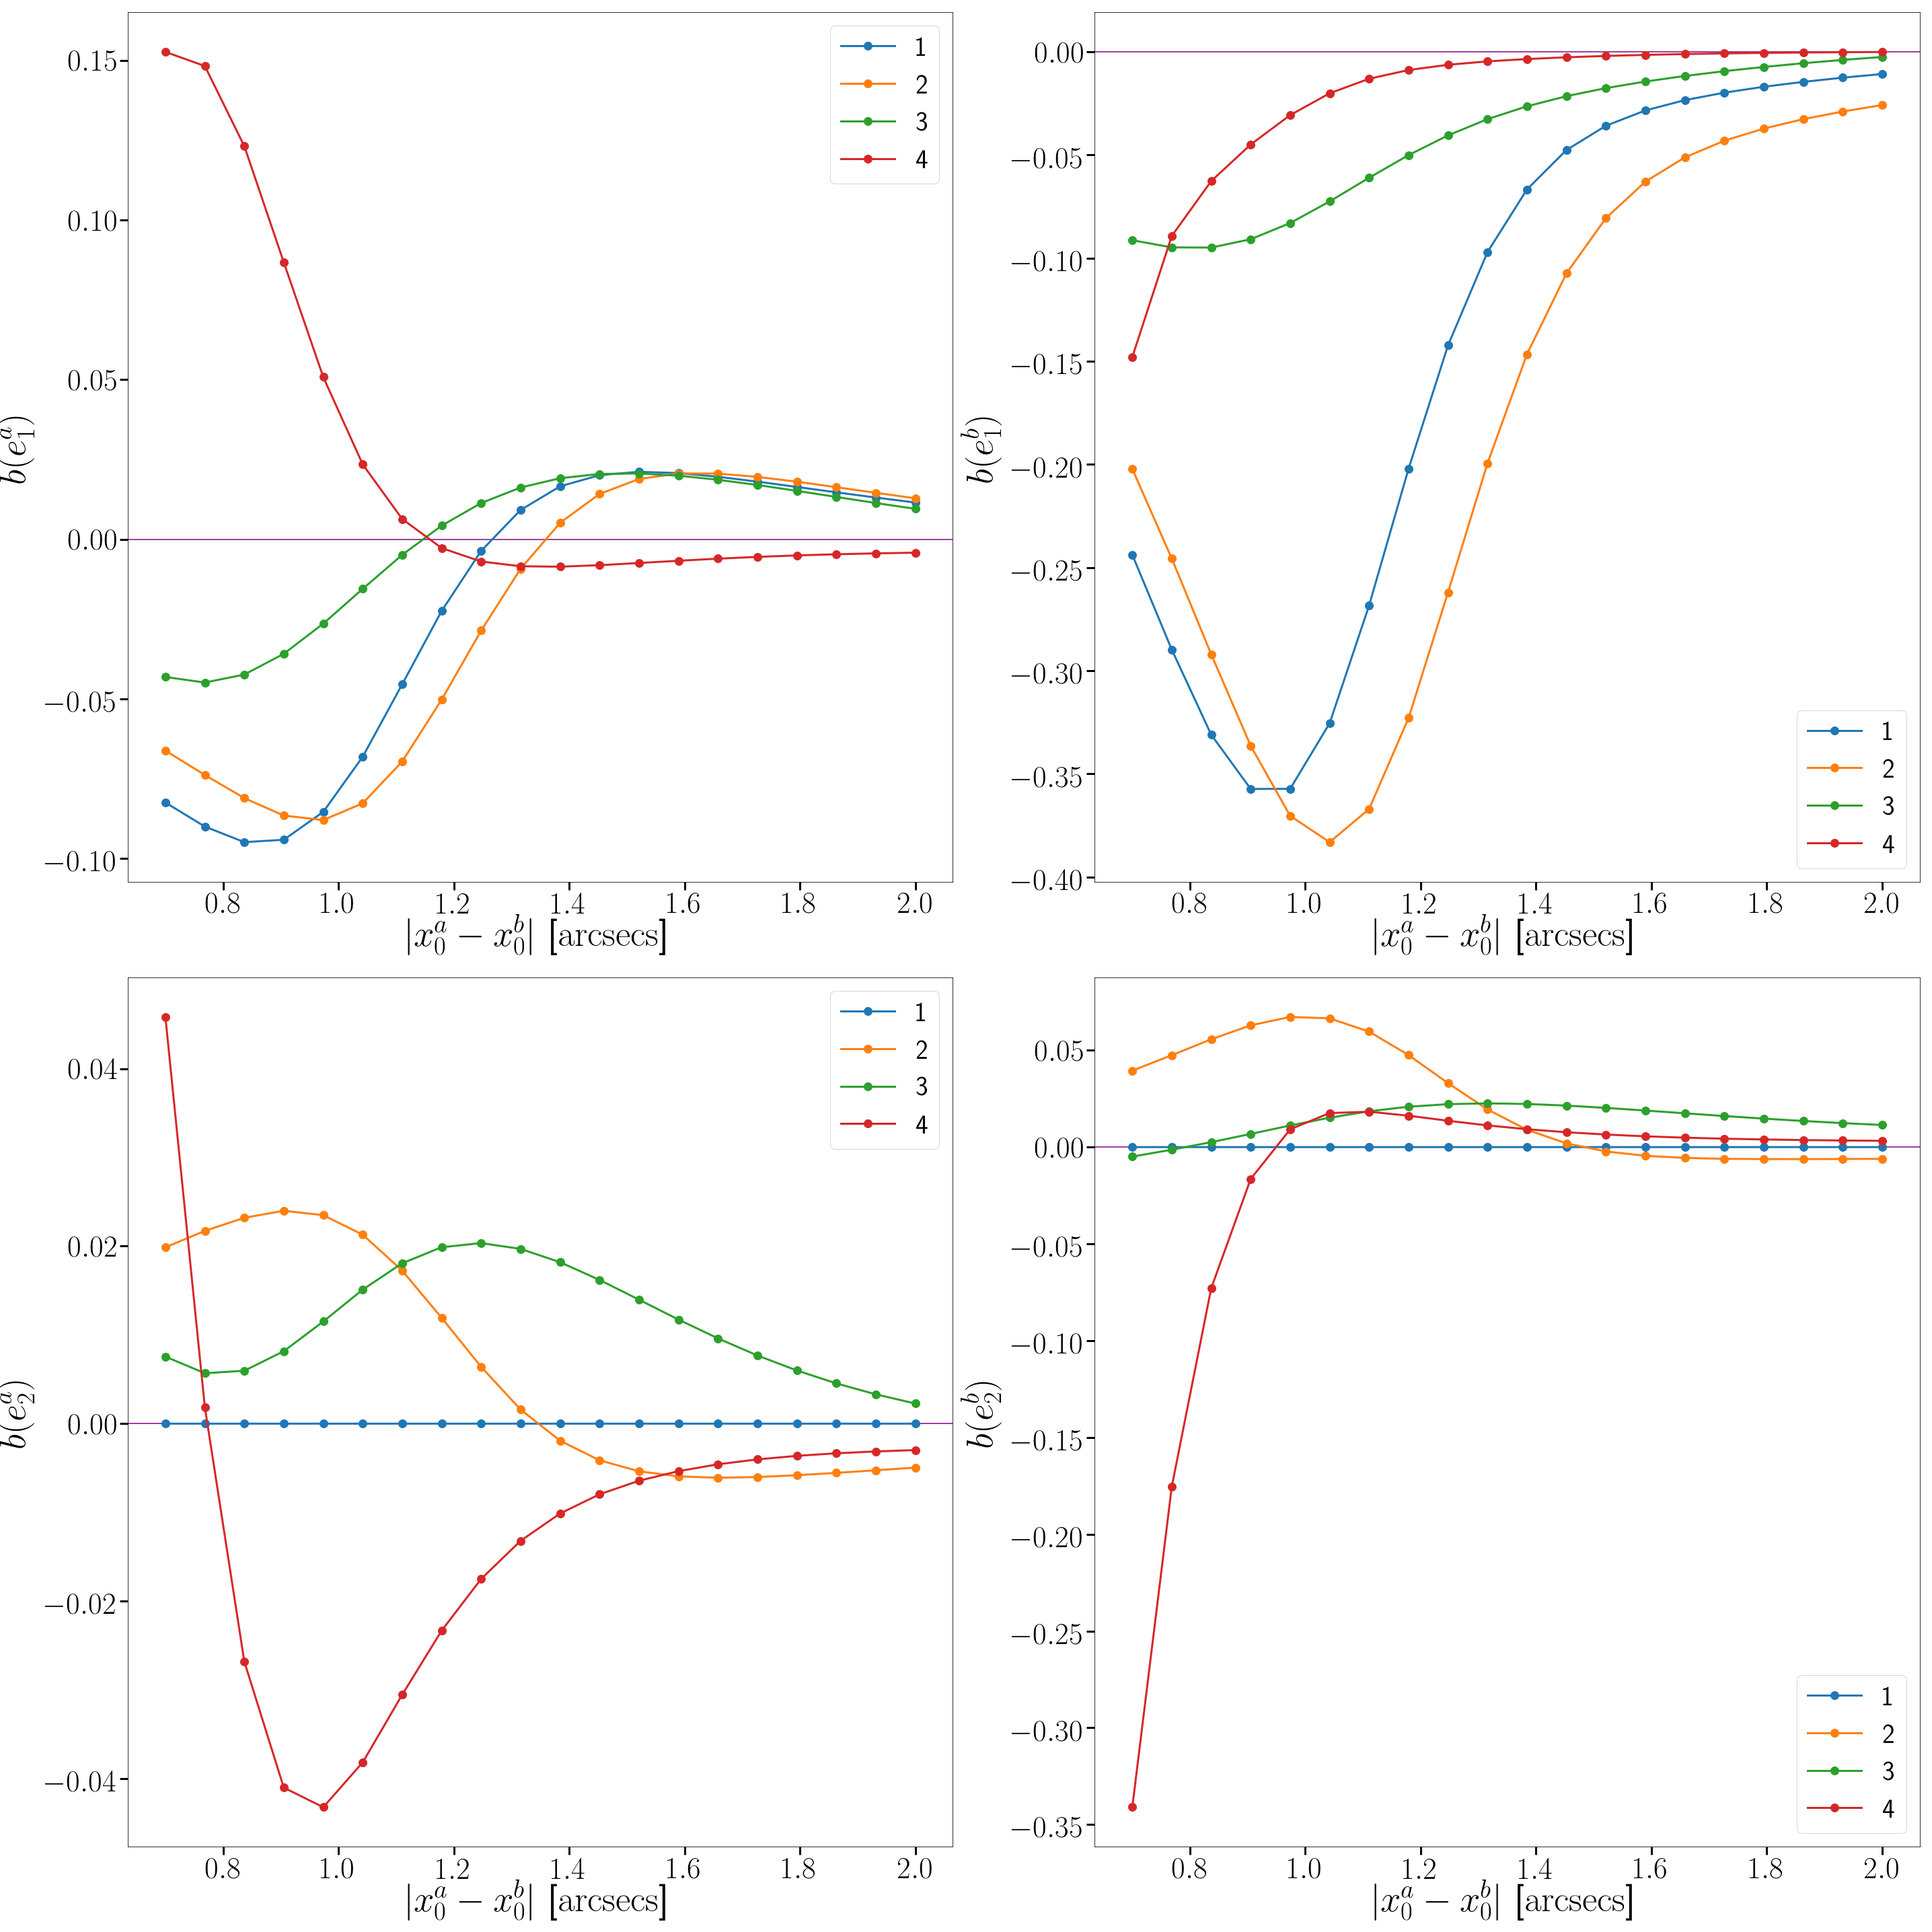

In [107]:
biasSeparationThree(fish,image_renderer,['e1_1','e1_2','e2_1','e2_2'],4)

In [37]:
fish.biases

{'e1_1': -0.0023598312,
 'e1_2': 0.0023477855,
 'e2_1': -0.002359227,
 'e2_2': 0.0023599537,
 'flux_1': 0.0050281817,
 'flux_2': 0.0050224918,
 'hlr_1': -0.0034998772,
 'hlr_2': -0.0035032257,
 'x0_1': 2.2130989e-06,
 'x0_2': -1.3326373e-06,
 'y0_1': 2.5960617e-07,
 'y0_2': 4.3935142e-07}

In [38]:
fish.g_parameters.id_params

{'1': {'e1': 0.2,
  'e2': 0.2,
  'flux': 1.0,
  'galaxy_model': 'gaussian',
  'hlr': 0.5,
  'psf_flux': 1.0,
  'psf_fwhm': 0.7,
  'psf_model': 'psf_gaussian',
  'x0': 2.0,
  'y0': 0.0},
 '2': {'e1': -0.2,
  'e2': -0.2,
  'flux': 1.0,
  'galaxy_model': 'gaussian',
  'hlr': 0.5,
  'psf_flux': 1.0,
  'psf_fwhm': 0.7,
  'psf_model': 'psf_gaussian',
  'x0': -2.0,
  'y0': 0.0}}

# Triange plot and fits 

In [9]:
#parameters of galaxy to draw. 
model = 'gaussian' #possible options of model and psf_model are in documentation. 
psf_model = 'psf_gaussian'
e1 = .2
e2 = .2 
hlr = .5 
psf_fwhm = .7
snr = 20.
x0 = 1. 
y0 = 1. 

#project folder name where you want to write galaxy information 
project = 'project-tutorial-fits'

In [11]:
# cmd = 'python generate.py -p {0} -gal 1 --galaxy-model {1} --psf_model {2}  --e1 {3} --e2 {4} --x0 {5} --y0 {6}  \
# --flux 1. --psf_flux 1. --hlr {7} --psf_fwhm {8} --snr {9}'.format(project,model,psf_model,e1,e2,x0,y0,hlr,psf_fwhm,snr)
# output = subprocess.check_output(cmd, shell=True)
# print output

NameError: name 'subprocess' is not defined

### Get analysis from file, 

In [10]:
import analysis.fisher as fisher 
import analysis.galfun as galfun
import analysis.defaults as defaults 

In [11]:
g_parameters = galfun.GParameters(project) #extract parameters from file created by generate.py 
image_renderer = galfun.ImageRenderer(pixel_scale=defaults.PIXEL_SCALE,nx=defaults.NX,ny=defaults.NY)
fish = fisher.Fisher(g_parameters=g_parameters,image_renderer=image_renderer, snr=snr)

### Do the fits, 

In [12]:
#using lm does a fitting to number_fits noise realizations of the galaxy above 
#produces a file for each of the fittings in the given project folde.r 
number_fits = 10000

In [ ]:
#this is the cmd for local (but will take a long time)
cmd_local = 'python fitting.py -p {0} --snr {1} -n {2} -rf'.format(project,snr,number_fits)

#and for a SLAC computer. 
cmd_slac = 'python fitting.py -p {0} --snr {1} -n {2} -rfs short'.format(project,snr,number_fits)

#
print cmd_local
print cmd_slac

### Process the results from files, 


In [13]:
%%capture
pulls,residualsb,biases,pull_means,res_stds,pull_mins,pull_maxs,redchis = galfun.read_results(project,g_parameters,fish)

### Produce the figure containing fisher 68% prediction, 

In [14]:
#constants needed for the plots below 
EXTENT_PULL = (-3, 3)
BINS_PULL = 40
SIG_DIGITS = 6

In [166]:
def errorEllipseCor(centroid, cor_xy, alpha=1.52):
    """
    Return a correlation ellipse according to Dan Coe paper arxiv.0906.4123.

    We use correlations instead of covariances for the ellipses because most of
    the parameters in our models have dimensions.
    Confidence level by default is 68.3% -> alpha = 1.52 according to the same
    paper.

    Args:
        centroid(:py:tuple): Position of the center of the ellipse in
                             (x,y) form.

    Returns:
        An mpatch.Ellipse object
    """
    import matplotlib.patches as mpatch

    a = 1 + cor_xy
    b = 1 - cor_xy
    theta = 45
    width = 2 * alpha * a
    height = 2 * alpha * b

    ellipse = mpatch.Ellipse(xy=centroid, width=width, height=height,
                             angle=theta, edgecolor='r', fc='None', lw=2)

    return ellipse

In [167]:
def fisher_prediction(params,bound_mins,bound_maxs,fish,number_fits):
    """Draws a triangle shaped plot with the fisher prediction for 68% confidence level"""

    fish_figure = plt.figure(figsize=(11, 11)) #this is the figure containing the fisher predictions. 
    normalized_area = (EXTENT_PULL[1] - EXTENT_PULL[0]) * (number_fits / BINS_PULL)
    param_names = fish.param_names
    num_params = len(params)
    color_hist = 'red'
    for param in params:
        # produce pull plot.

        dim = num_params + 1  # for redchi add extra dimension.
        #here we create our triangle. 
        ####i are the rows, or the y-axis, and j are the columns or the x-axis. 
        for i in range(dim):
            for j in range(dim):
                plt.rc('text', usetex=True)
                if i < num_params and j < num_params and i >= j:
                    param_i = param_names[i]
                    param_j = param_names[j]
                    sigma_i = math.sqrt(fish.covariance_matrix[param_i,param_i])
                    sigma_j = math.sqrt(fish.covariance_matrix[param_j, param_j])
                    mean = (fish.biases[param_j] / sigma_j,fish.biases[param_i] / sigma_i)
                    cor_xy = fish.correlation_matrix[param_j, param_i]

                    if i == j:
                        sigma_gauss = 1 #normalize normal pdf.
                        x = np.linspace(EXTENT_PULL[0], EXTENT_PULL[1], 1000)
                        ax = fish_figure.add_subplot(dim, dim, dim * i + j + 1)
                        ax.plot(x, normalized_area * mlab.normpdf(x, mean[0],sigma_gauss),color=color_hist)
                        sigma_fisher = round(sigma_i, SIG_DIGITS)
                        sigma_fits = round(res_stds[param_i], SIG_DIGITS)

                        #error of bias_fits
                        sigma_1 = round(sigma_fits / math.sqrt(number_fits),SIG_DIGITS)
                        #error of sigma_fits
                        sigma_2 = round(sigma_fits / math.sqrt(2*number_fits), SIG_DIGITS)
                        bias_fisher = round(fish.biases[param_i],SIG_DIGITS)
                        bias_fits = round(biases[param_i],SIG_DIGITS)
                        
                        if i == 4 or i==5: 
                            data = (
                                  r'\begin{eqnarray*}' +
                                  r'\sigma_{\rm F}' + '&=&' +
                                  '{:+.4f}'.format(sigma_fisher) +
                                  r'\\' +
                                  r'\sigma_{\rm fit}' + '&=&' +
                                  '{:+.4f}'.format(sigma_fits) +
                                  r'\pm' +
                                  '{:.4f}'.format(sigma_2) +
                                  r'\\' +
                                  r'b_{F}' + '&=&' +
                                  '{:+.4f}'.format(bias_fisher) +
                                  r'\\' +
                                  r'b_{\rm fit}' + '&=&' +
                                  '{:+.4f}'.format(bias_fits) +
                                  r'\pm' +
                                  '{:.4f}'.format(sigma_1) +
                                  r'\end{eqnarray*}')
                        
                        else: 
                            data = (
                                  r'\begin{eqnarray*}' +
                                  r'\sigma_{\rm F}' + '&=&' +
                                  '{:.5f}'.format(sigma_fisher) +
                                  r'\\' +
                                  r'\sigma_{\rm fit}' + '&=&' +
                                  '{:.5f}'.format(sigma_fits) +
                                  r'\pm' +
                                  '{:.5f}'.format(sigma_2) +
                                  r'\\' +
                                  r'b_{F}' + '&=&' +
                                  '{:+.5f}'.format(bias_fisher) +
                                  r'\\' +
                                  r'b_{\rm fit}' + '&=&' +
                                  '{:+.5f}'.format(bias_fits) +
                                  r'\pm' +
                                  '{:.5f}'.format(sigma_1) +
                                  r'\end{eqnarray*}')




                        ax.text(1.725, .35, data,
                                transform=ax.transAxes, ha='center',
                                fontsize=10,
                                fontweight='bold')

                        # add green lines indicating bounds.
                        ax.axvline(x=pull_mins[param_j], color='g')
                        ax.axvline(x=pull_maxs[param_j], color='g')

                    elif i > j:
                        # draw an error_ellipse in off-diagonals axises.
                        ellip = errorEllipseCor(mean, cor_xy)
                        ax = fish_figure.add_subplot(dim, dim,
                                                     dim * i + j + 1)
                        ax.add_patch(ellip)

                        ax.axhline(y=pull_mins[param_i], color='g')
                        ax.axhline(y=pull_maxs[param_i], color='g')
#                         ax.axhline(y=mean[1], color='y')


                        ax.axvline(x=pull_mins[param_j], color='g')
                        ax.axvline(x=pull_maxs[param_j], color='g')
#                         ax.axvline(x=mean[0], color='y')

                else:
                    ax = fish_figure.add_subplot(dim,
                                                 dim,
                                                 dim * i + j + 1)
    plt.rc('text', usetex=True)
    return fish_figure

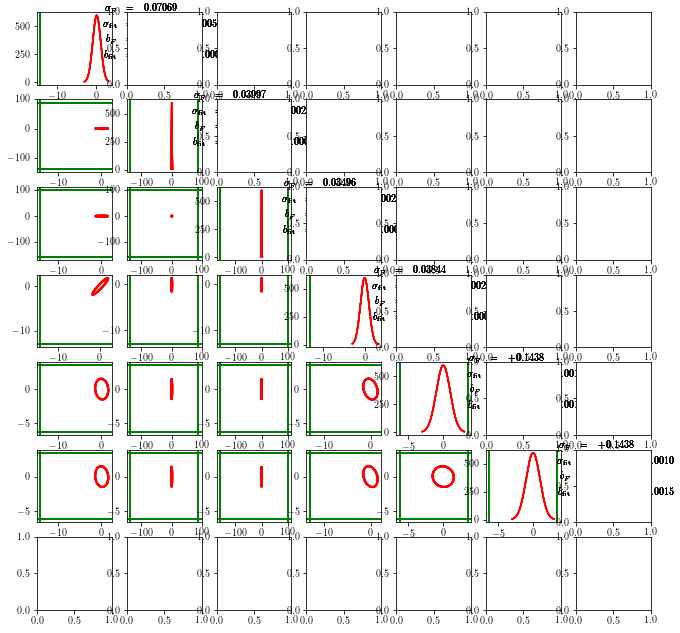

In [168]:
fish_figure = fisher_prediction(pulls.keys(),pull_mins,pull_maxs,fish,number_fits)

### Produce final corner plot 

In [169]:
import corner

In [170]:
def fit_plots(pulls,pull_mins,pull_maxs,pull_means,redchis,fish,fish_figure=None):
    """Draws a triangle plot with fisher predictions overalayed and the results from the fittings."""
    param_names = fish.param_names
    num_params = fish.num_params

    # have to transform point.values to a convenient form for the plot.
    extents = [EXTENT_PULL] * num_params + [(min(redchis),max(redchis))]
    points_plot = []
    truths = []
    plot_names = []

    for param in param_names:
        if 'e1' in param:
            tex_param = r'$e_{1}$'
        elif 'e2' in param:
            tex_param = r'$e_{2}$'
        elif 'x0' in param:
            tex_param = r'$x_{0}$'
        elif 'y0' in param:
            tex_param = r'$y_{0}$'
        elif 'hlr' in param: 
            tex_param = r'$\rm{HLR}$'
        else:
            tex_param = r'$\rm{flux}$'
        plot_names.append(tex_param)

    plot_names.append(r'$\chi^{2}/dof$')

    for param in param_names:
        points_plot.append(pulls[param])
        truths.append(pull_means[param])

    #chi2, redchi should be centered around 1
    truths.append(1)
    points_plot.append(redchis)
    
    hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 'no_fill_contours':False,'fill_contours':False}
    #here we overlay the produced fish_figure and the triangle plot. 
    figure1 = corner.corner(np.array(points_plot).transpose(),
                              bins=BINS_PULL,
                              labels=plot_names,
                              range=extents,
                              truths=truths,
                              show_titles=True,
                              title_fmt=None, 
                              title_kwargs={"fontsize": 12},label_kwargs={"fontsize": 12},
                              fig=fish_figure,hist_kwargs=None,**hist2d_kwargs)

    figure1.subplots_adjust(hspace=.2, wspace=.2) #adjust to avoid overlap.
    figure1.savefig(os.path.join(project, 'triangle.pdf'))
    print os.path.join(project, 'triangle.pdf')
    plt.rc('text', usetex=True)

In [171]:
 #figure is saved in project folder because of its complexity. 
fit_plots(pulls,pull_mins,pull_maxs,pull_means,redchis,fish,fish_figure)

project-tutorial-fits/triangle.pdf


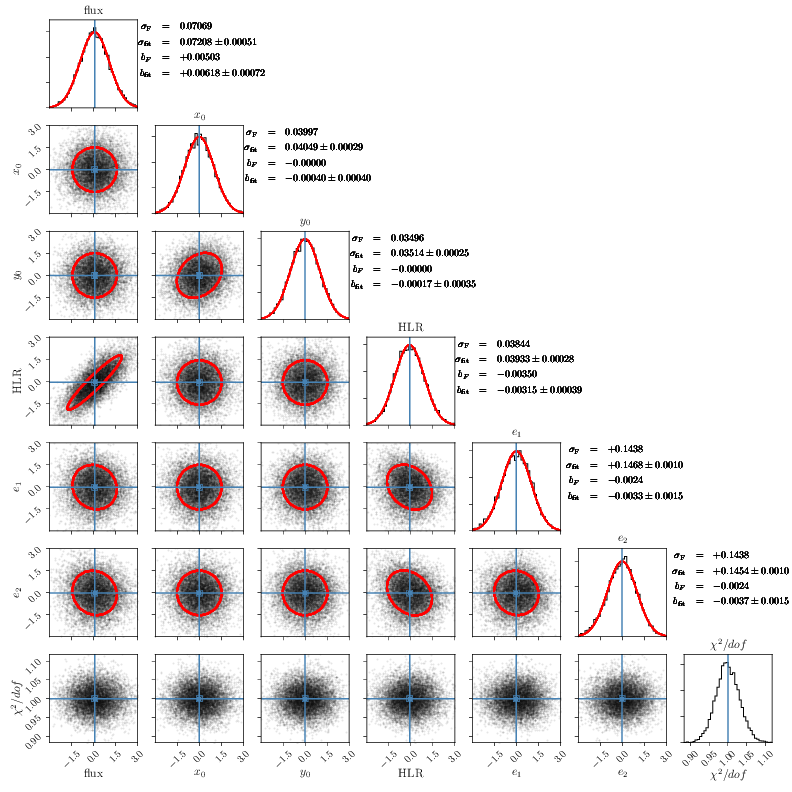

In [172]:
from wand.image import Image as WImage
img = WImage(filename='project-tutorial-fits/triangle.pdf')
img

## Calculate covariance matrix 

In [62]:
covariance_matrix = np.zeros((fish.num_params,fish.num_params))
for i in range(fish.num_params): 
    for j in range(fish.num_params): 
        param_i = fish.param_names[i]
        param_j = fish.param_names[j]
        sumation = 0. 
        for (pull_i,pull_j) in zip(pulls[param_i],pulls[param_j]):
            sumation += (pull_i - pull_means[param_i]) * (pull_j - pull_means[param_j])
        covariance_matrix[i,j] = sumation/(len(pulls[param_i]) - 1) 

correlation_matrix = np.zeros((fish.num_params,fish.num_params))

for i in range(fish.num_params): 
    for j in range(fish.num_params): 
        correlation_matrix[i,j] = covariance_matrix[i,j] / np.sqrt(covariance_matrix[i,i] * covariance_matrix[j,j])
            
        

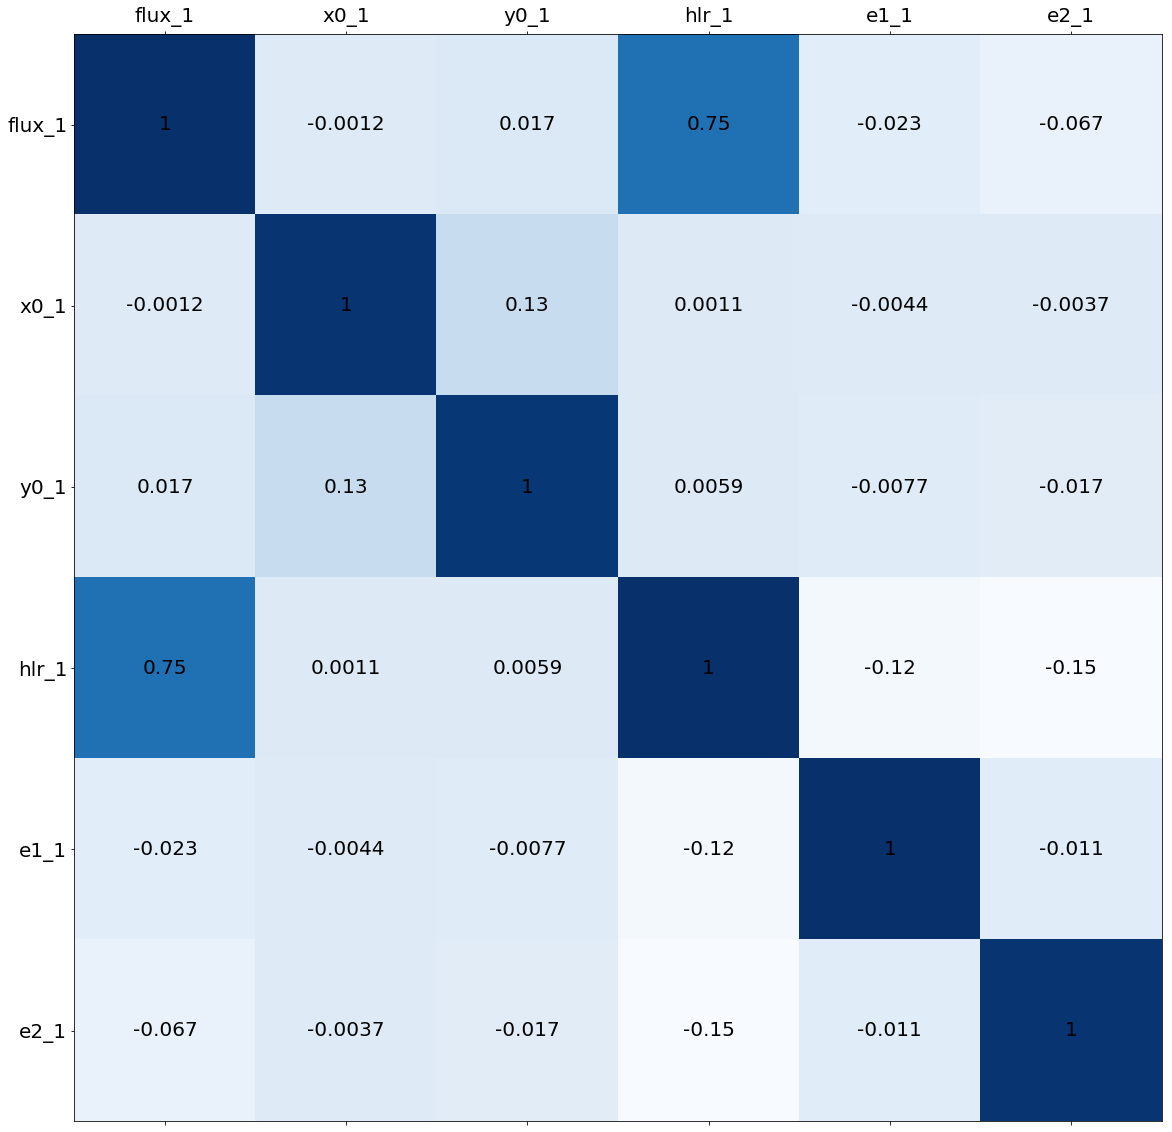

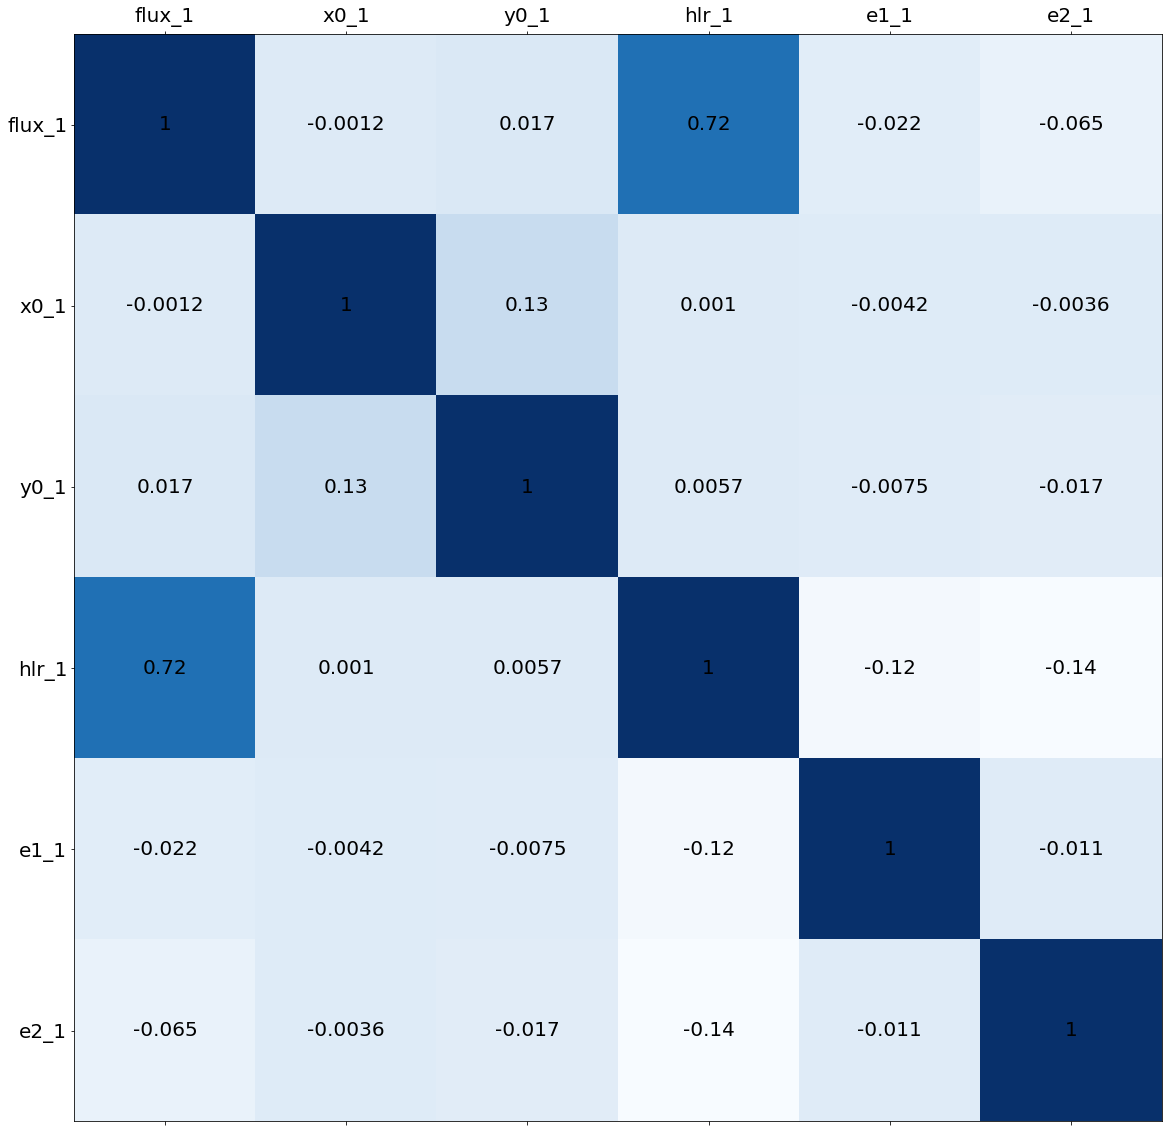

In [63]:
plot_matrix(covariance_matrix,fish.param_names) 
plot_matrix(correlation_matrix,fish.param_names) 

In [91]:
fish.biases['hlr_1']

-0.003499883

In [ ]:
hlr_1
flux_1
(-0.091046045128016354, 0.071116401966970166)
0.0384408020063 0.0706916407197

### Plot of individual flux vs snr

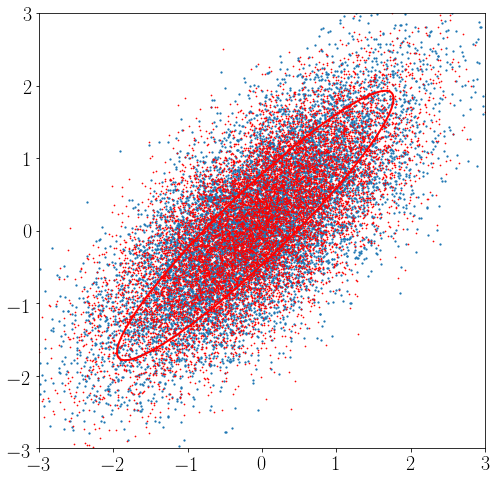

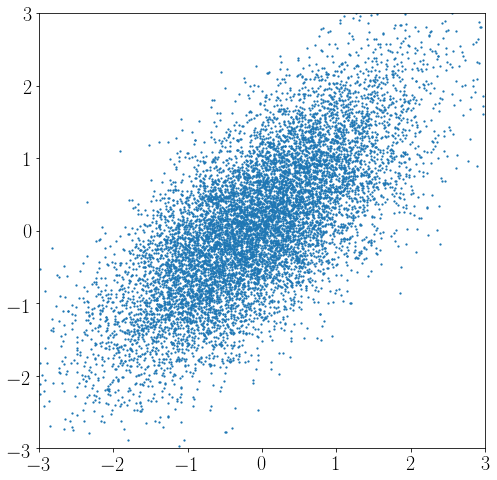

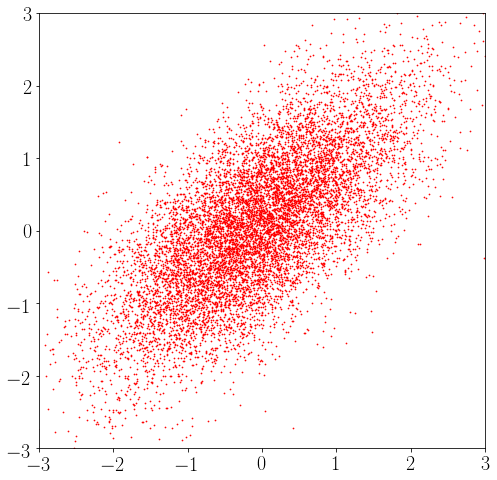

In [185]:
fig = plt.figure(figsize=(8, 8))
param_i = 'flux_1'
param_j = 'hlr_1'
sigma_i = math.sqrt(fish.covariance_matrix[param_i,param_i])
sigma_j = math.sqrt(fish.covariance_matrix[param_j, param_j])
mean = (fish.biases[param_j] / sigma_j,fish.biases[param_i] / sigma_i)
cor_xy = fish.correlation_matrix[param_j, param_i]
ellip = errorEllipseCor(mean, cor_xy)
ax = fig.add_subplot(111)
ax.add_patch(ellip)

ax.axhline(y=pull_mins[param_i], color='g')
ax.axhline(y=pull_maxs[param_i], color='g')
ax.axvline(x=pull_mins[param_j], color='g')
ax.axvline(x=pull_maxs[param_j], color='g')

plt.scatter(pulls[param_j],pulls[param_i],s=1.5)

plt.xlim(-3,3)
plt.ylim(-3,3)

plt.xticks(fontsize=10)

plt.tick_params(axis='both', which='major', labelsize=20)



####produce 
cov = [[1, cor_xy], [cor_xy, 1]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.scatter(x, y, c='red',s=.5)
# plt.axis('equal')


plt.show()


fig = plt.figure(figsize=(8, 8))

plt.scatter(pulls[param_j],pulls[param_i],s=1.5)
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.xticks(fontsize=10)

plt.tick_params(axis='both', which='major', labelsize=20)

plt.show() 


fig = plt.figure(figsize=(8, 8))

####produce 
cov = [[1, cor_xy], [cor_xy, 1]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.scatter(x, y, c='red',s=.5)
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.xticks(fontsize=10)

plt.tick_params(axis='both', which='major', labelsize=20)

# plt.axis('equal')
plt.show()



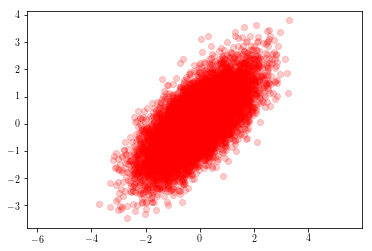

In [178]:
mean = (fish.biases[param_j] / sigma_j,fish.biases[param_i] / sigma_i)
sigma_i = math.sqrt(fish.covariance_matrix[param_i,param_i])
sigma_j = math.sqrt(fish.covariance_matrix[param_j, param_j])
cor_xy = fish.correlation_matrix[param_j, param_i]



cov = [[1, cor_xy], [cor_xy, 1]]  # diagonal covariance
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.plot(x, y, 'o',c='red',alpha=.2)
plt.axis('equal')
plt.show()


# fig = plt.figure(figsize=(8, 8))
# param_i = 'flux_1'
# param_j = 'hlr_1'
# sigma_i = math.sqrt(fish.covariance_matrix[param_i,param_i])
# sigma_j = math.sqrt(fish.covariance_matrix[param_j, param_j])
# mean = (fish.biases[param_j] / sigma_j,fish.biases[param_i] / sigma_i)
# cor_xy = fish.correlation_matrix[param_j, param_i]
# ellip = errorEllipseCor(mean, cor_xy)
# ax = fig.add_subplot(111)
# ax.add_patch(ellip)

# ax.axhline(y=pull_mins[param_i], color='g')
# ax.axhline(y=pull_maxs[param_i], color='g')
# ax.axvline(x=pull_mins[param_j], color='g')
# ax.axvline(x=pull_maxs[param_j], color='g')

# plt.scatter(pulls[param_j],pulls[param_i],s=1.5)

# plt.xlim(-3,3)
# plt.ylim(-3,3)

# plt.xticks(fontsize=10)

# plt.tick_params(axis='both', which='major', labelsize=20)